<a href="https://colab.research.google.com/github/ADITYAAV80/Data-Science/blob/main/Bike%20Data%20Analysis%20and%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis on Bike Sharing Dataset

#Defining some functions to perform EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path1 = '/content/drive/MyDrive/hour.csv'
file_path2 = '/content/drive/MyDrive/day.csv'

In [ ]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
day_df = pd.read_csv("/content/drive/MyDrive/day.csv")

#Hour DF Description

|Variable Name|	Role|	Type|	Description|	Units|	Missing Values|
|-------------|------|-----|------------|-------|----------------|
|instant	|ID	 |Integer|	||		||no|
|dteday	|Feature	|Date	|date		||no|
|season	|Feature	|Categorical	|1:winter, 2:spring, 3:summer, 4:fall		||no|
|yr	|Feature	|Categorical	|year (0: 2011, 1: 2012)		||no|
|mnth	|Feature	|Categorical	|month (1 to 12)		||no|
|hr	|Feature	|Categorical	|hour (0 to 23)		||no|
|holiday	|Feature	|Binary	|weather day is holiday or not ||no
|weekday	|Feature	|Categorical	|day of the week		||no|
workingday	|Feature	|Binary	|if day is neither weekend nor holiday is 1, otherwise is 0		||no|
|weathersit	|Feature	|Categorical	 |1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 		||no|
|temp	|Feature	|Continuous	|Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)	|C	|no|
|atemp	|Feature	|Continuous	|Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)	|C|no|
|hum	|Feature	|Continuous	|Normalized humidity. The values are divided to 100 (max)		||no|
|windspeed	|Feature	|Continuous	|Normalized wind speed. The values are divided to 67 (max)		||no|
|casual	|Other	|Integer	|count of casual users		||no|
|registered	|Other	|Integer	|count of registered users		||no|
|cnt	|Target|	Integer	|count of total rental bikes including both casual and registered		||no|



In [ ]:
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

#Day DF Description

It is same as hours dataframe just that the data is clubbed for 1 day<br>
So obviosuly hours column is removed

In [ ]:
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
#function to differentiate categorical and numerical columns
def check_categorical_columns(df):
  categorical_columns = []
  for i in df.columns:
    distinctval = set()
    for j in df[i]:
      distinctval.add(j)
    if len(distinctval) <= 24:
      categorical_columns.append(i)
  return categorical_columns

#for categorical columns
def get_min_max_mode(column):
  map = {}
  for i in hour_df[column]:
    if i not in map:
      map[i] = 1
    else:
      map[i] += 1
  maxcount = 0
  for index,val in map.items():
    if val > maxcount:
      maxcount = val
      mode = i
  return mode,maxcount

#for numerical columns
def get_min_max_mean(column):
  minval,maxval,mean=float('inf'),-float('inf'),0
  for i in hour_df[column]:
    if i < minval:
      minval = i
    if i > maxval:
      maxval = i
    mean += i
  mean /= len(hour_df[column])
  return minval,maxval,mean

#function to describe data
def describe(df):
  categorical_columns = check_categorical_columns(df)
  for i in df.columns:
    if i in ignorestatcolumns:
      continue
    elif i in categorical_columns:
      mode,count = get_min_max_mode(i)
      print("Column",i)
      print('mode',mode)
      print('count',count)
      print()
    else:
      min,max,mean = get_min_max_mean(i)
      print("Column",i)
      print('min',min)
      print('max',max)
      print('mean',mean)
      print()

#Checking shapes of Datasets

In [ ]:
print(hour_df.shape)
print(day_df.shape)

(17379, 17)
(731, 16)


#Checking for empty columns

There are no empty values

In [ ]:
count_na_values(hour_df)

Columns with NA values:


In [ ]:
count_na_values(day_df)

Columns with NA values:


#Checking DataType of all columns


*   We can observe all the dataypes are of integer, float and date data type which means we do not have any textual data



In [ ]:
check_data_types(hour_df)

instant int64
dteday object
season int64
yr int64
mnth int64
hr int64
holiday int64
weekday int64
workingday int64
weathersit int64
temp float64
atemp float64
hum float64
windspeed float64
casual int64
registered int64
cnt int64


In [ ]:
check_data_types(day_df)

instant int64
dteday object
season int64
yr int64
mnth int64
holiday int64
weekday int64
workingday int64
weathersit int64
temp float64
atemp float64
hum float64
windspeed float64
casual int64
registered int64
cnt int64


#Working out which columns are categorical and resetting data types

In [ ]:
print("Hour DF")
categorical_columns_hour = check_categorical_columns(hour_df)
print(categorical_columns_hour)
for var in categorical_columns_hour:
    hour_df[var] = hour_df[var].astype("category")
print("Day DF")
categorical_columns_day = check_categorical_columns(day_df)
print(categorical_columns_day)
for var in categorical_columns_day:
    day_df[var] = day_df[var].astype("category")

Hour DF
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
Day DF
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [ ]:
ignorestatcolumns = ['instant','dteday']

#Describing the dataset

In [ ]:
describe(hour_df)

Column season
mode 1
count 4496

Column yr
mode 1
count 8734

Column mnth
mode 12
count 1488

Column hr
mode 23
count 730

Column holiday
mode 0
count 16879

Column weekday
mode 1
count 2512

Column workingday
mode 1
count 11865

Column weathersit
mode 1
count 11413

Column temp
min 0.02
max 1.0
mean 0.4969871684216586

Column atemp
min 0.0
max 1.0
mean 0.4757751021347581

Column hum
min 0.0
max 1.0
mean 0.6272288394038822

Column windspeed
min 0.0
max 0.8507
mean 0.1900976063064631

Column casual
min 0
max 367
mean 35.67621842453536

Column registered
min 0
max 886
mean 153.78686920996606

Column cnt
min 1
max 977
mean 189.46308763450142



#Rechecking Data Types

In [ ]:
check_data_types(hour_df)

instant int64
dteday object
season category
yr category
mnth category
hr category
holiday category
weekday category
workingday category
weathersit category
temp float64
atemp float64
hum float64
windspeed float64
casual int64
registered int64
cnt int64


In [ ]:
check_data_types(day_df)

instant int64
dteday object
season category
yr category
mnth category
holiday category
weekday category
workingday category
weathersit category
temp float64
atemp float64
hum float64
windspeed float64
casual int64
registered int64
cnt int64


#EDA on Day DataSet

In [ ]:
#Setting colours to palletes fa - sets of colors sa - no of colors
custom_palette = sn.color_palette("Set2", 8)
season_palette = {'winter':'blue', 'fall': 'red', 'spring':'orange', 'summer':'green'}
weekday_palette = sn.color_palette("Set1", 7)
weather_palette = {'mist': 'blue', 'clear': 'brown', 'snow': 'green'}
month_palette = sn.color_palette("Set3", 12)

In [ ]:
day_df.describe()

instant        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.495385    0.474354    0.627894    0.190486   
std    211.165812    0.183051    0.162961    0.142429    0.077498   
min      1.000000    0.059130    0.079070    0.000000    0.022392   
25%    183.500000    0.337083    0.337842    0.520000    0.134950   
50%    366.000000    0.498333    0.486733    0.626667    0.180975   
75%    548.500000    0.655417    0.608602    0.730209    0.233214   
max    731.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

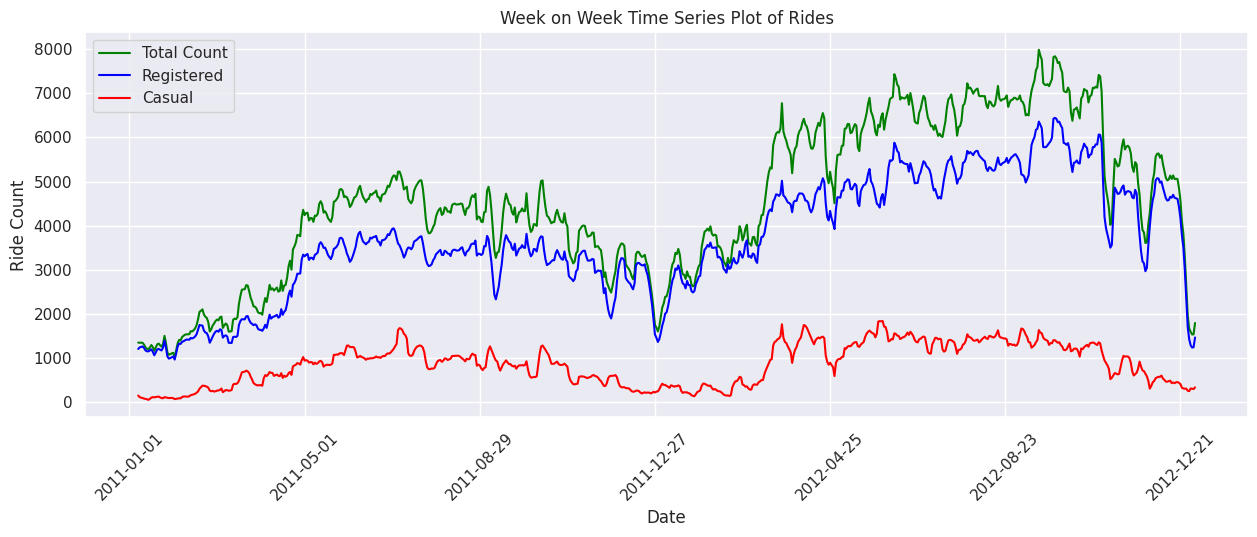

In [ ]:
#smoothening timeseries data

plot_df = day_df[['registered', 'casual', 'cnt']]

# Set the rolling window size
window = 7

# Apply the rolling mean
plot_df = plot_df.rolling(window=window).mean()

# Add the 'dteday' column back to the DataFrame (unaltered)
plot_df['dteday'] = day_df['dteday']


# Plot the data
sn.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
sn.lineplot(x='dteday', y='cnt', data=plot_df,  color='green', label = 'Total Count')
sn.lineplot(x='dteday', y='registered',data=plot_df, color='blue', label = 'Registered')
sn.lineplot(x='dteday', y='casual',data=plot_df,color='red', label = 'Casual' )

plt.title('Week on Week Time Series Plot of Rides')
plt.xlabel('Date')
plt.ylabel('Ride Count')
tick_dates = plot_df['dteday'][::120]  # Every 7th date
plt.xticks(tick_dates, rotation=45)
plt.legend()

plt.show()

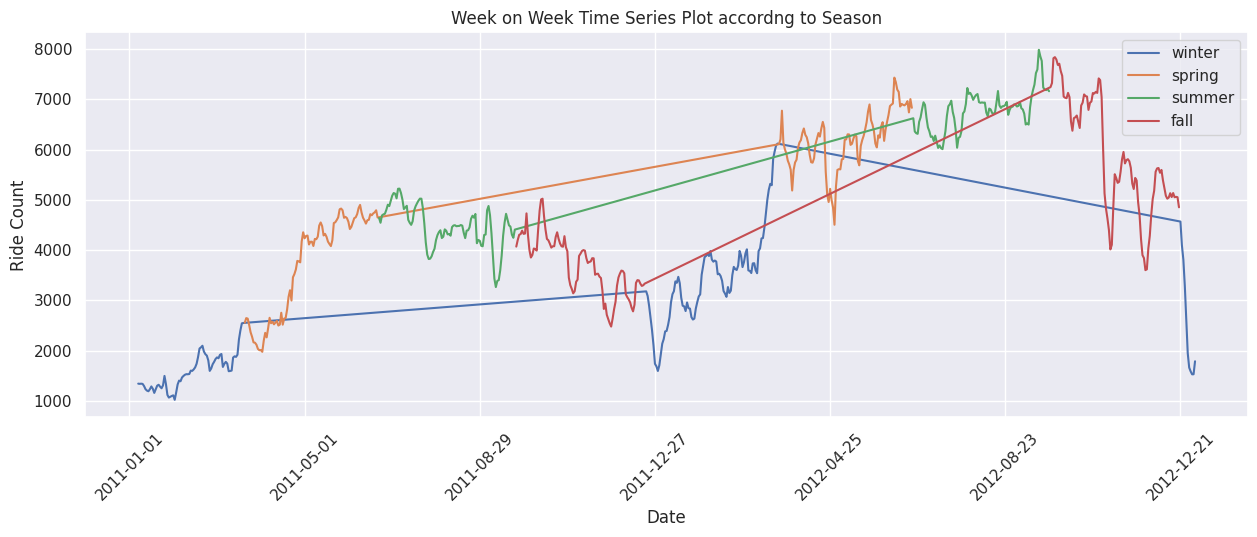

In [ ]:
plot_df['season'] = day_df['season']
plot_df['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}, inplace=True)
plt.figure(figsize=(15, 5))

sn.lineplot(x='dteday', y='cnt', data=plot_df, hue = 'season')

plt.title('Week on Week Time Series Plot accordng to Season')
plt.xlabel('Date')
plt.ylabel('Ride Count')
tick_dates = plot_df['dteday'][::120]  # Every 7th date
plt.xticks(tick_dates, rotation=45)
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Observation

* The Ride Count is seasonal in nature, but is increasing YoY.
* Week on Week the Rideship is increasing in seasons winter and spring
* WoW the rideship remains constant or slightly increasing in summer
* Then it starts decreasing in fall as winter approaches

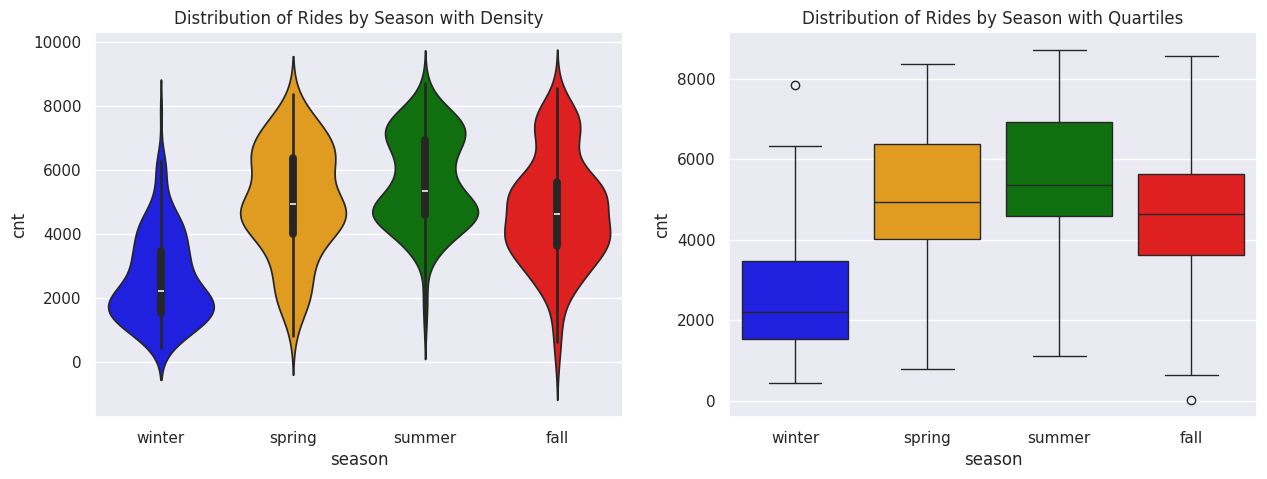

In [ ]:
plot_df = day_df[['season', 'cnt']]
plot_df['season'] = day_df['season']
plot_df['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}, inplace=True)
plot_df['cnt'] = day_df['cnt']

fig, list1 = plt.subplots(1, 2, figsize=(15, 5))
ax1, ax2 = list1.flatten()

sn.violinplot(data = plot_df, x= 'season', y ='cnt', hue = 'season', palette = season_palette, ax = ax1)
ax1.set_title('Distribution of Rides by Season with Density')



sn.boxplot(data = plot_df, x= 'season', y ='cnt', hue = 'season', palette = season_palette, ax = ax2)
ax2.set_title('Distribution of Rides by Season with Quartiles')

plt.show()

## Observation

* Spring and Summer are high ride count seasons
* Winter has the lowest ride count

Text(0.5, 1.0, 'Distribution of Rides by Weekday')

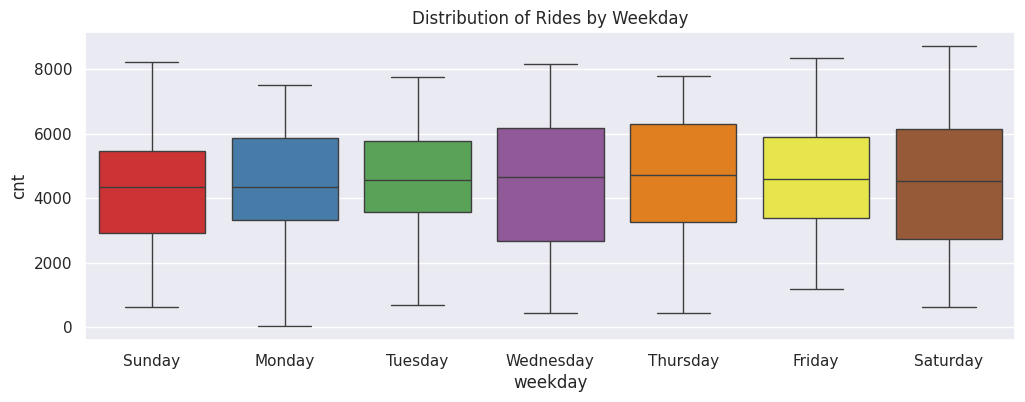

In [ ]:
# figure, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(16, 8))

plt.figure(figsize=(12, 4))

plot_df = day_df[['cnt', 'weekday', 'workingday', 'holiday']]
plot_df['weekday'] = plot_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
sn.boxplot(data = plot_df, x= 'weekday', y ='cnt', hue = 'weekday', palette = weekday_palette)
plt.title('Distribution of Rides by Weekday')

##Observation

* On average the ride count across week seems to remain same

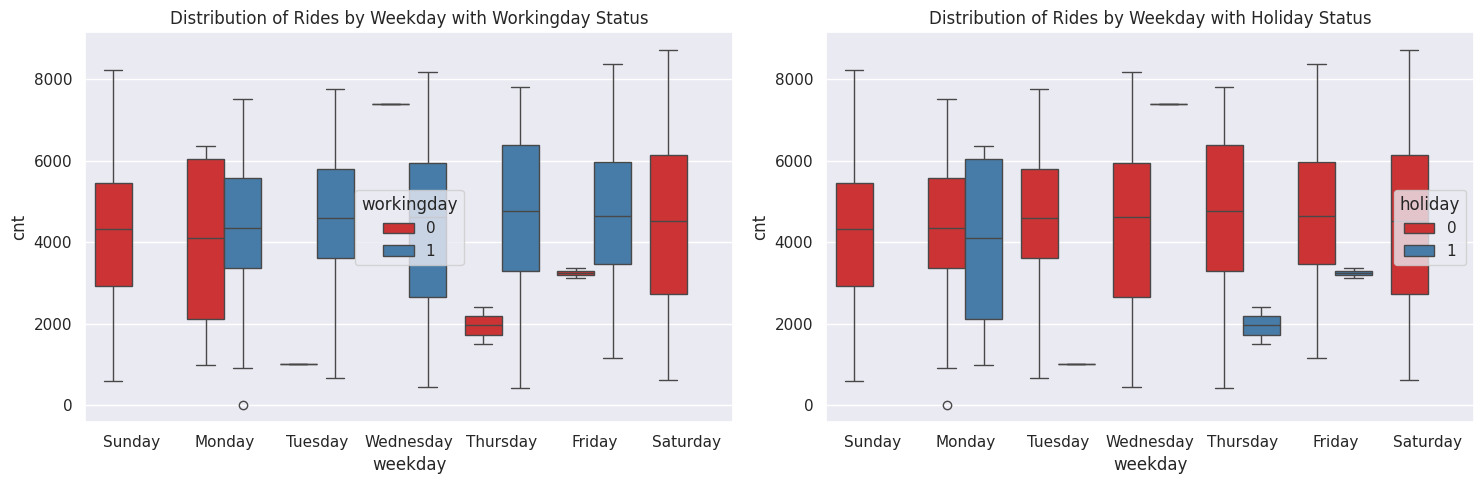

In [ ]:
fig, list1 = plt.subplots(1, 2, figsize=(15, 5))
ax1, ax2 = list1.flatten()

sn.boxplot(data=plot_df, x='weekday', y='cnt', hue='workingday', palette=weekday_palette,ax = ax1)
ax1.set_title('Distribution of Rides by Weekday with Workingday Status')

sn.boxplot(data=plot_df, x='weekday', y='cnt', hue='holiday', palette=weekday_palette,ax = ax2)
ax2.set_title('Distribution of Rides by Weekday with Holiday Status')

# Adjust layout to fit the title
plt.tight_layout()

# Show the plot
plt.show()

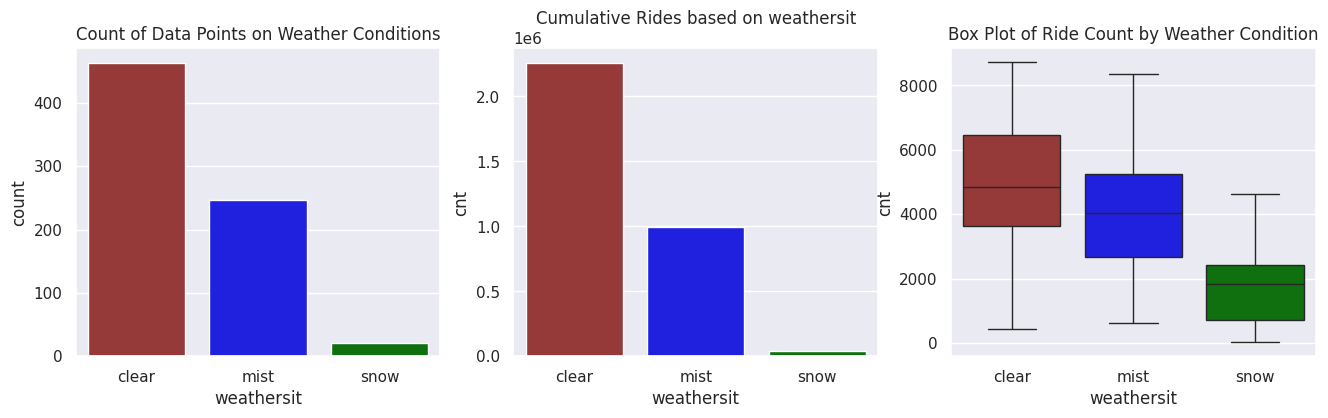

In [ ]:
data_df = day_df[['cnt', 'weathersit']]

data_df['weathersit'] = data_df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'snow', 4: 'rain'})

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sn.countplot(data=data_df, x='weathersit', ax=axes[0], palette=weather_palette)
axes[0].set_title('Count of Data Points on Weather Conditions')

season_order = ['Clear', 'Mist', 'Light Snow', 'Heavy Rain']

data_df1 = data_df.groupby('weathersit').sum('cnt')
sn.barplot(data=data_df1, x='weathersit', y = 'cnt', ax=axes[1], palette=weather_palette)
axes[1].set_title('Cumulative Rides based on weathersit')

sn.boxplot(data=data_df, x='weathersit', y='cnt', ax=axes[2], palette=weather_palette)
axes[2].set_title('Box Plot of Ride Count by Weather Condition')

plt.show()


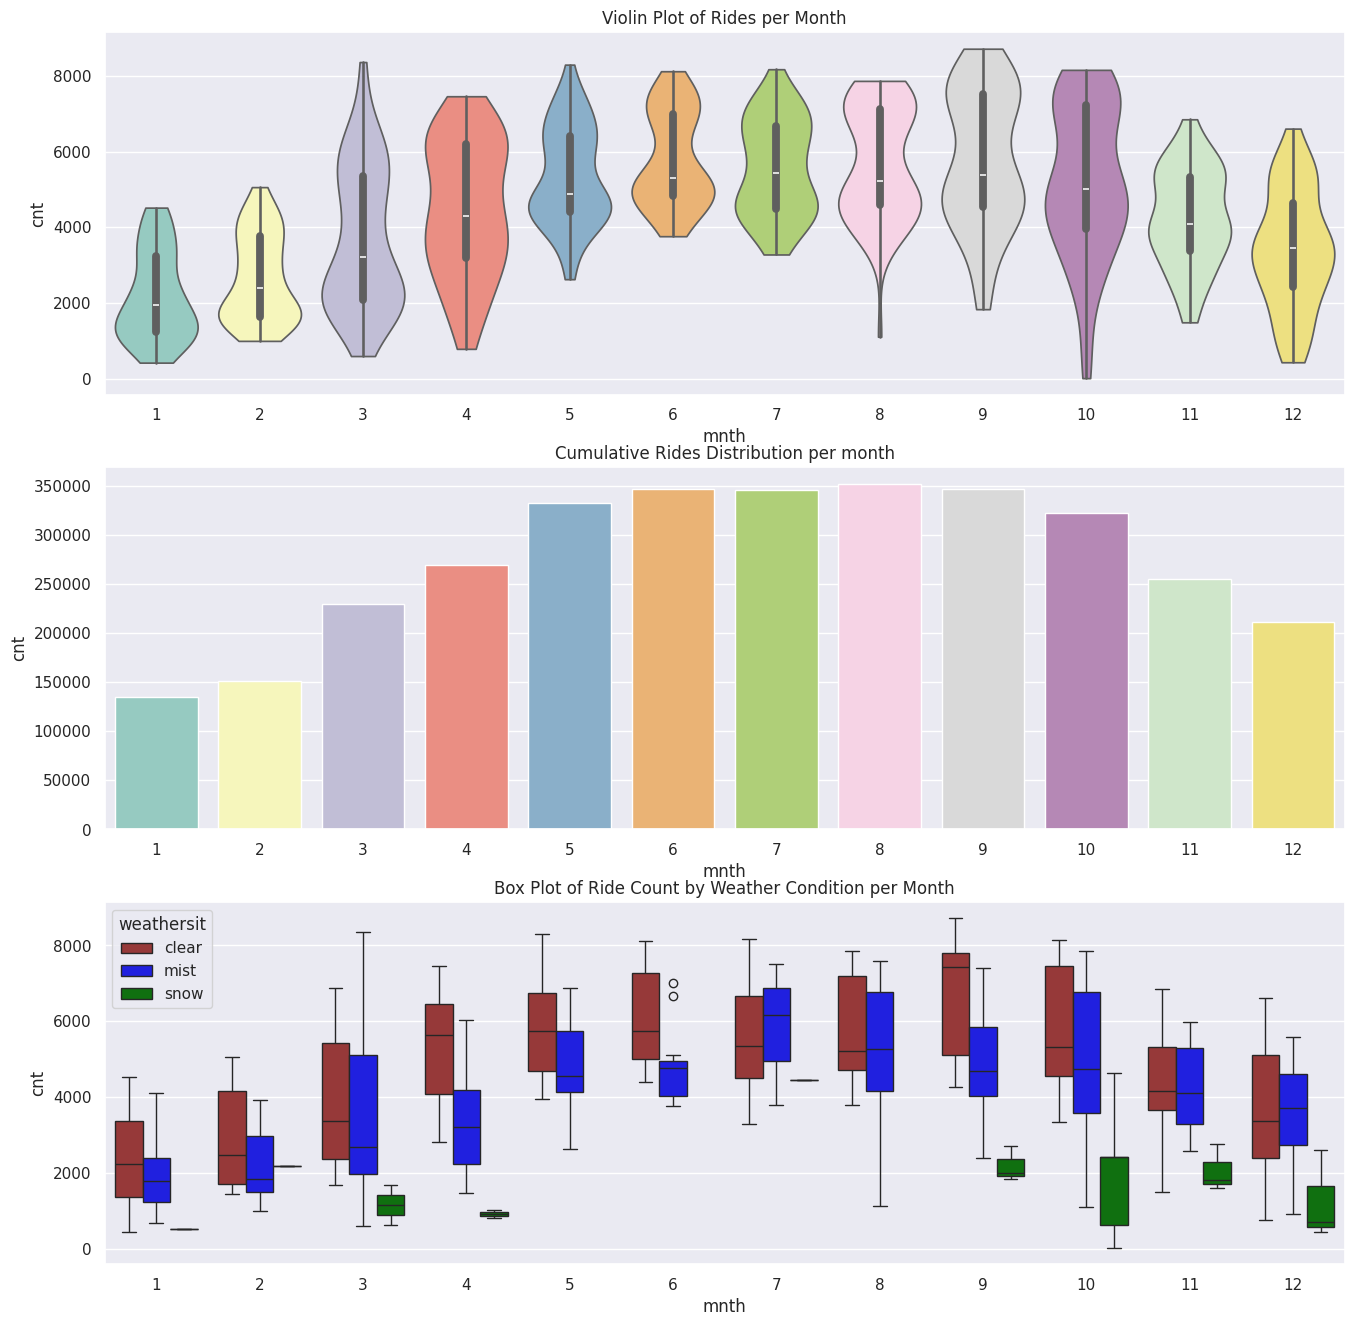

In [ ]:
data_df = day_df[['cnt', 'weathersit', 'mnth','yr']]
data_df['weathersit'] = data_df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'snow', 4: 'rain'})

fig, axes = plt.subplots(3, 1, figsize=(16, 16))

sn.violinplot(data=data_df, x='mnth', y = 'cnt', cut = 0,ax=axes[0], palette=month_palette)
axes[0].set_title('Violin Plot of Rides per Month')



data_df1 = data_df.groupby('mnth').sum('cnt')
sn.barplot(data=data_df1, x='mnth', y = 'cnt' ,ax=axes[1], palette=month_palette)
axes[1].set_title('Cumulative Rides Distribution per month')

sn.boxplot(data=data_df, x='mnth', y='cnt', ax=axes[2], hue = 'weathersit', palette = weather_palette)
axes[2].set_title('Box Plot of Ride Count by Weather Condition per Month')

plt.show()


## Observation

* Months May - September are high ride counts
* Months Jan - March and November - Dec are low ride count months
* Oct - Dec snow days have lowest ride counts


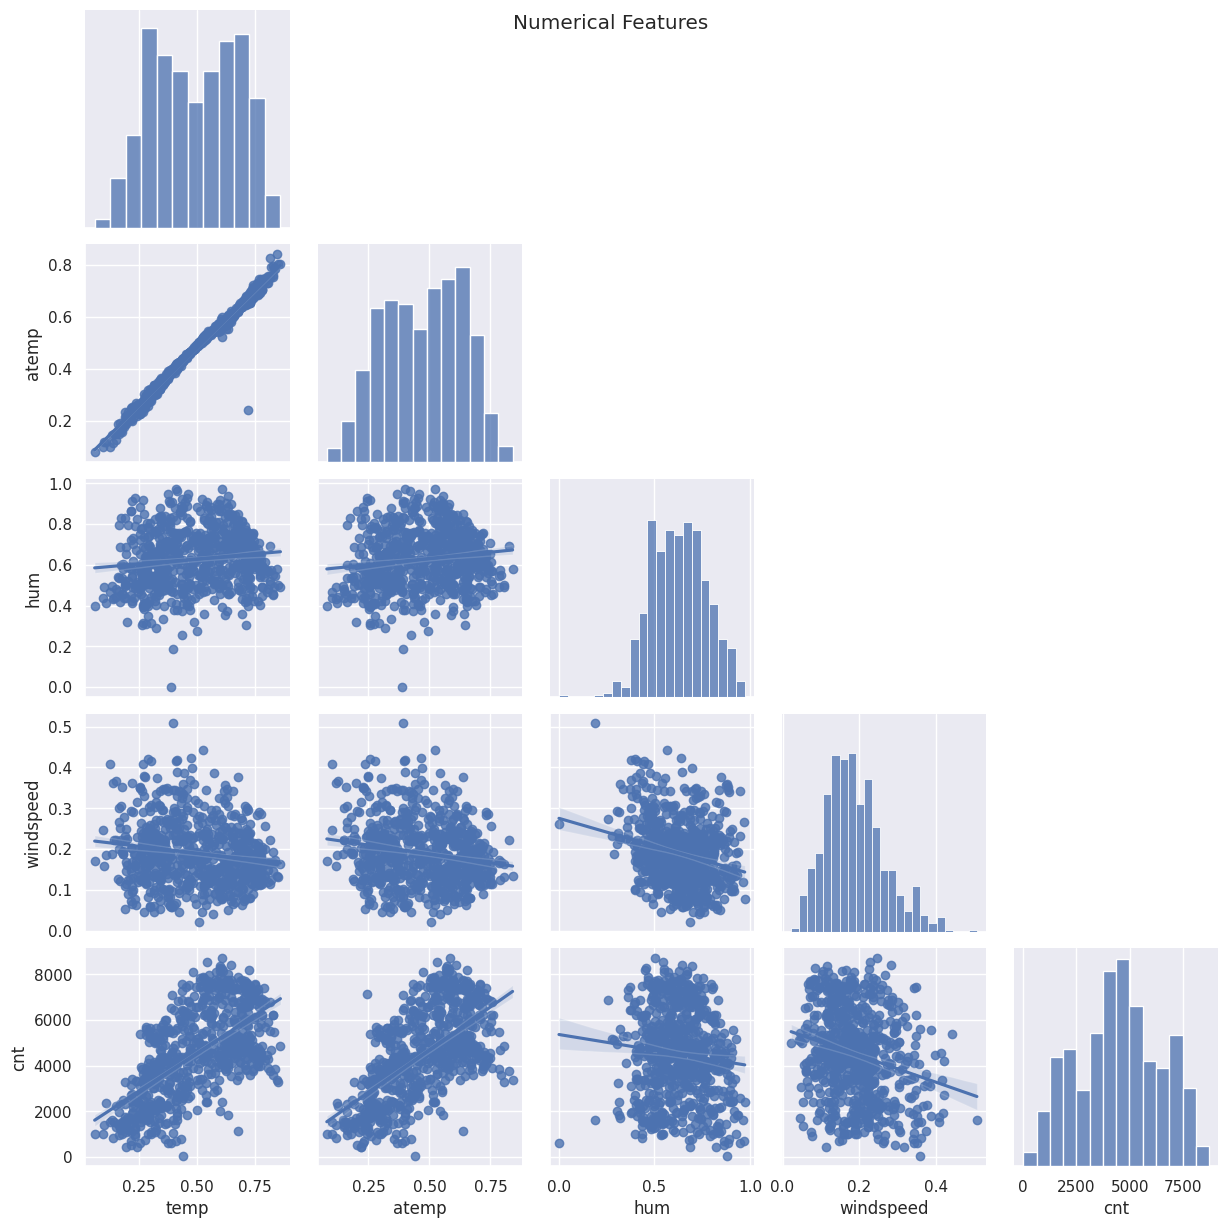

In [ ]:
numerical = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_df = day_df[numerical ]
g =sn.pairplot(data_df, diag_kind='auto', kind='reg', corner=True)
g.fig.suptitle("Numerical Features ")
plt.show()


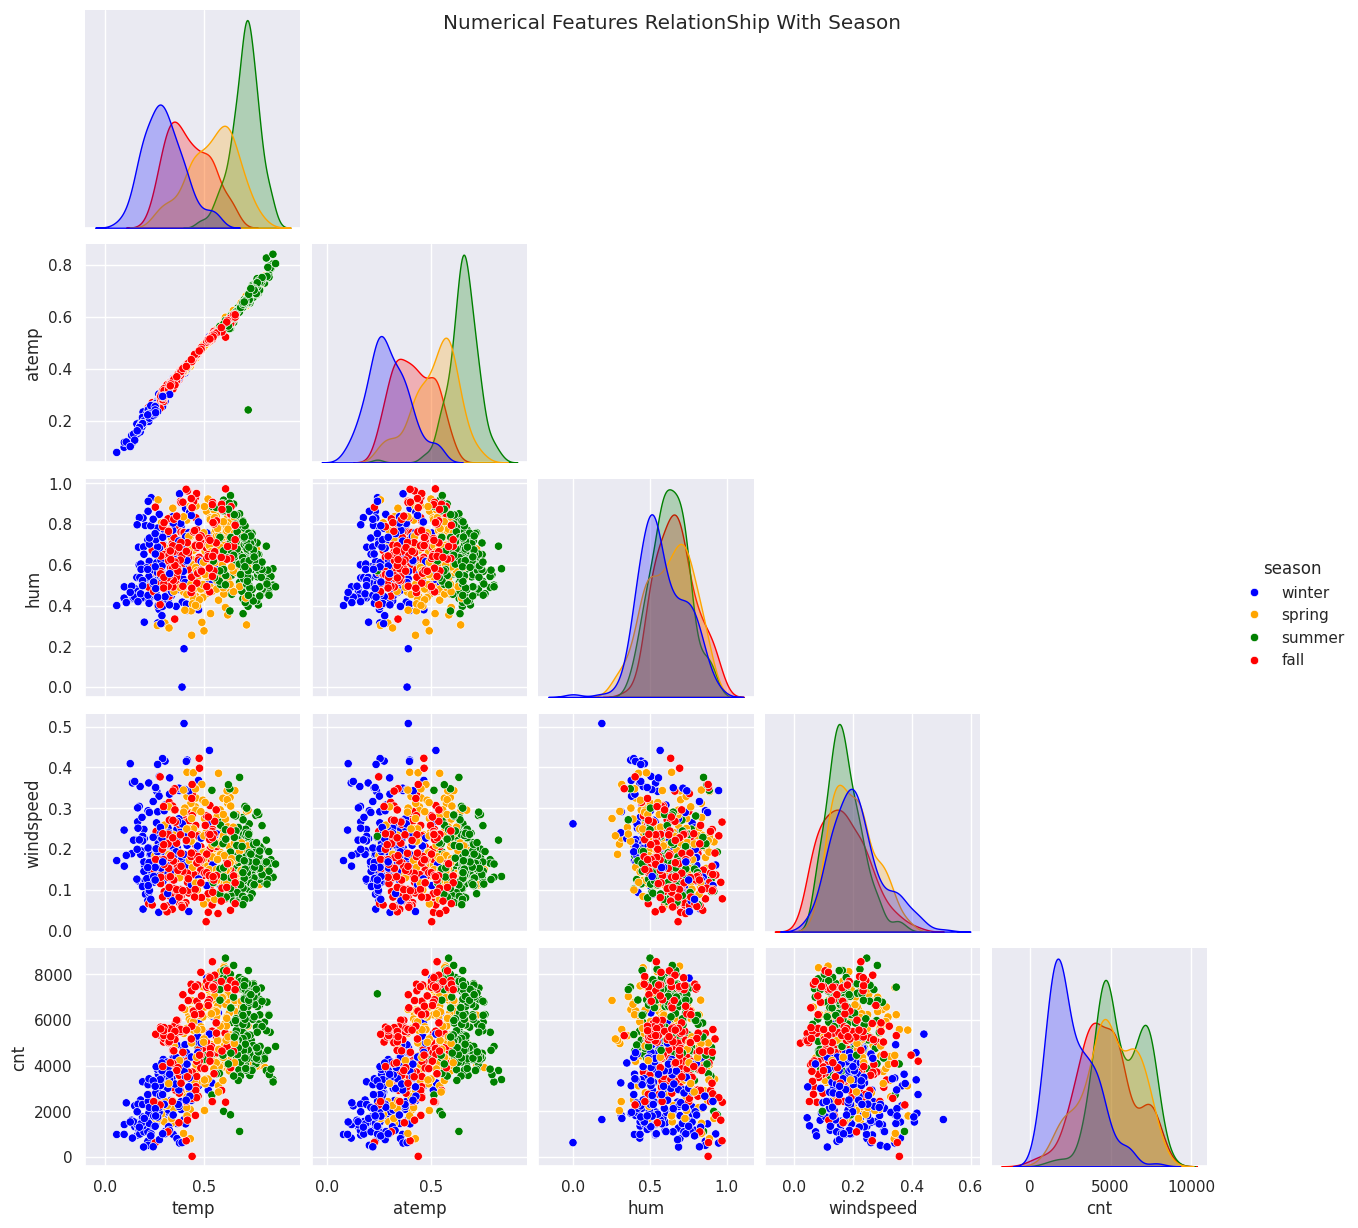

In [ ]:
numerical = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

data_df = day_df[numerical + ['season']]
data_df['season'] = data_df['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
g =sn.pairplot(data_df, diag_kind='auto', hue= 'season', palette = season_palette, corner=True)
g.fig.suptitle("Numerical Features RelationShip With Season")
plt.show()

## Observation

* temp and atemp is highly correlated
* humidity is positively correlated to temp for all season except snow
* Windspeed is negatively correlated to temp and hum for all season

In [ ]:
def calculate_quantiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    # Function to calculate percentile index
    def get_percentile_index(p):
        return (n - 1) * p

    # Calculate indices for Q1 (25th), Q2 (50th), Q3 (75th)
    Q1_idx = get_percentile_index(0.25)
    Q2_idx = get_percentile_index(0.50)
    Q3_idx = get_percentile_index(0.75)

    # Get the values for Q1, Q2, Q3
    Q1 = sorted_data[int(Q1_idx)]
    Q2 = sorted_data[int(Q2_idx)]
    Q3 = sorted_data[int(Q3_idx)]

    return Q1, Q2, Q3

def label_quartile_manual(cnt_value, quartileLimit):
    Q1, Q2, Q3 = quartileLimit
    if cnt_value <= Q1:
        return 'Q1'
    elif Q1 < cnt_value <= Q2:
        return 'Q2'
    elif Q2 < cnt_value <= Q3:
        return 'Q3'
    else:
        return 'Q4'

# Calculate the manual quartiles for 'cnt'
quartiles = calculate_quantiles(data_df['cnt'])


# Apply the function to create the new column with manually calculated quartiles
data_df['cnt_quartile'] = data_df['cnt'].apply(label_quartile_manual, quartileLimit=quartiles)

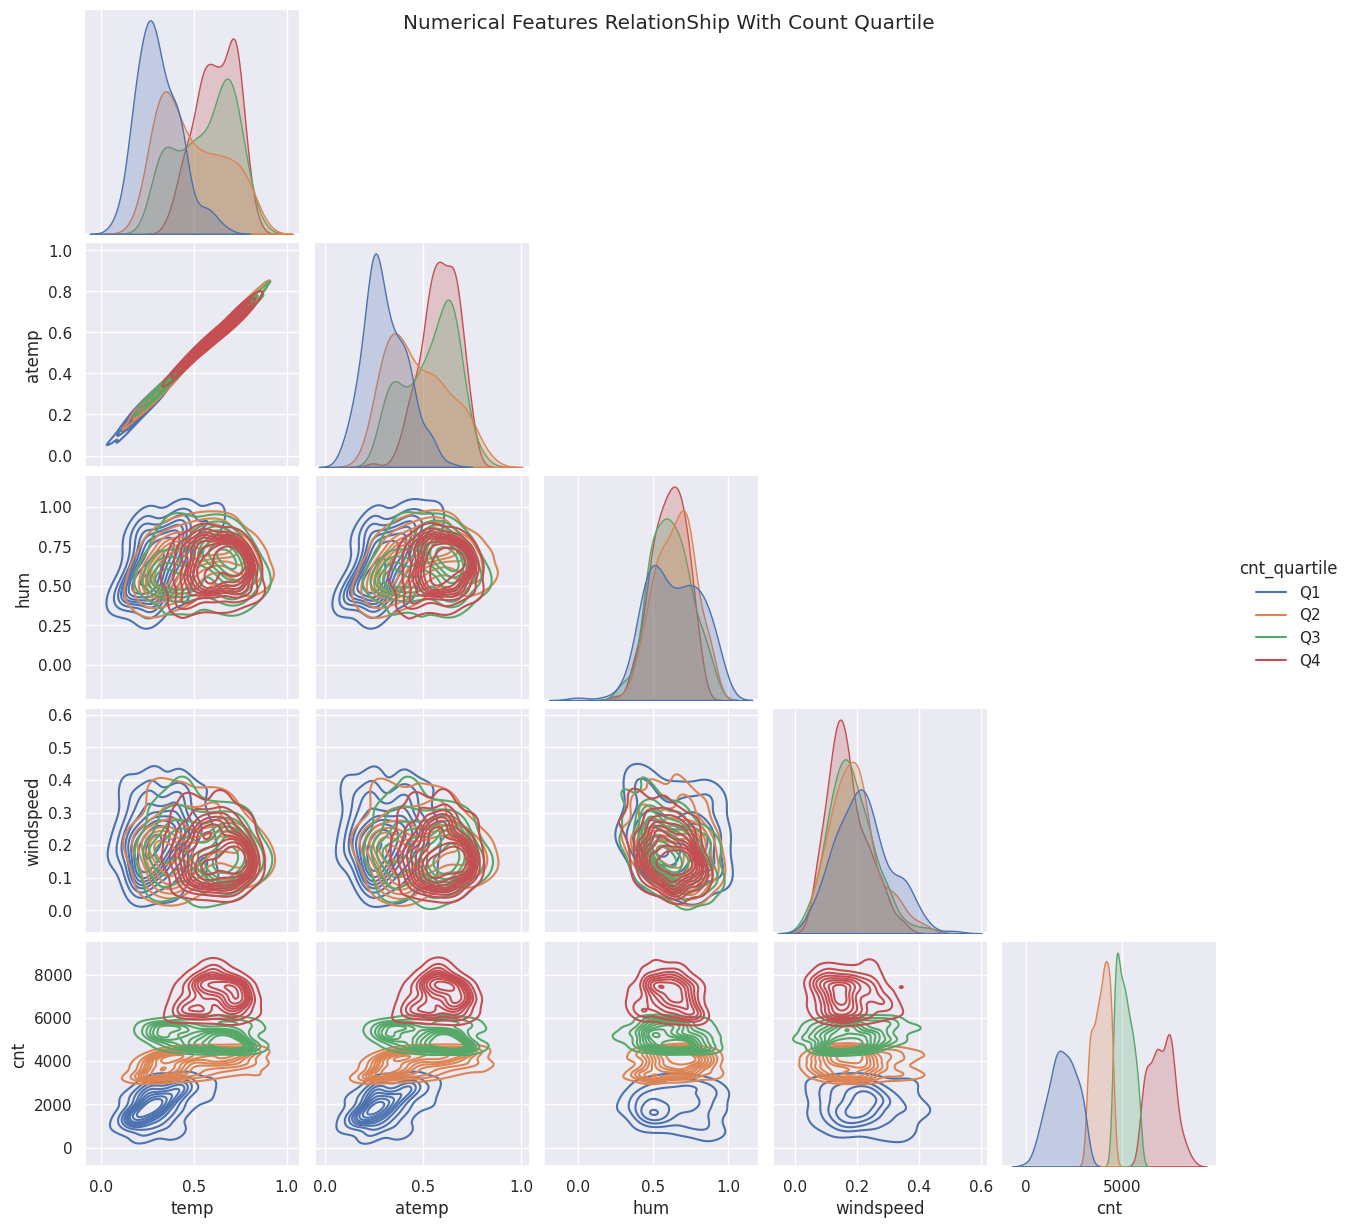

In [ ]:
g =sn.pairplot(data_df, diag_kind='auto', kind='kde', hue= 'cnt_quartile', corner=True)
g.fig.suptitle("Numerical Features RelationShip With Count Quartile")
plt.show()

## Observation

* Higher Rides count Quartile Seems to have higher temperature
* Higher rides Count Quartile seems to concentrate much more at hum 0.5-.6 and windspeed 0.15-.19
* Higher and lower ride count quartiles seem to be seprable among features (Temp -Humidity) and (Temp -Windspeed)

Feature Engineering

In [ ]:
categorical = ['season', 'mnth', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

numerical = ['temp', 'hum', 'windspeed',  'cnt']

train_df = day_df[numerical + categorical]
train_df['season'] = train_df['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
train_df['weathersit'] = train_df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'snow', 4: 'rain'})

train_df = OneHotEncode(train_df, ['season', 'weathersit'])


train_X = train_df.drop(['cnt'], axis = 1, inplace=False)
train_Y = pd.DataFrame()
train_Y['cnt'] = train_df['cnt']
train_X.head(5)

temp       hum  windspeed mnth yr holiday weekday workingday  \
0  0.344167  0.805833   0.160446    1  0       0       6          0   
1  0.363478  0.696087   0.248539    1  0       0       0          0   
2  0.196364  0.437273   0.248309    1  0       0       1          1   
3  0.200000  0.590435   0.160296    1  0       0       2          1   
4  0.226957  0.436957   0.186900    1  0       0       3          1   

   season_winter  season_spring  season_summer  season_fall  weathersit_mist  \
0              1              0              0            0                1   
1              1              0              0            0                1   
2              1              0              0            0                0   
3              1              0              0            0                0   
4              1              0              0            0                0   

   weathersit_clear  weathersit_snow  
0                 0                0  
1                 0                0  
2                 1                0  
3                 1                0  
4                 1                0

## K Means Clustering


In [ ]:
def random_k_representaives(df, k):
  random_indices = np.random.choice(df.shape[0], k, replace=False)
  # print("random_indices", random_indices)
  return df[random_indices]


def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

def assign_to_cluster(train_X, z, cluster_labels):
  J_Cost = 0
  for i, x in enumerate(train_X):
    min_dist = float('inf')
    min_index  = -1
    for j in range(z.shape[0]) :
      if(euclidean_distance(x, z[j] )< min_dist):
        min_dist =  euclidean_distance(x, z[j])
        min_index = j
      # print("assign: ", i, j , min_index, min_dist)
    J_Cost += min_dist
    cluster_labels[i] = min_index
  return J_Cost/train_X.shape[0]

def update_Representatives(train_X, z, cluster_labels):
  for i in range(z.shape[0]):
    cluster_points = train_X[cluster_labels == i]
    if(cluster_points.shape[0] == 0):
      continue
    z[i] = np.mean(cluster_points, axis=0)

def k_means(X, k, max_iters=1000, convergThreshold=1e-10):
    # Initialize cluster representatives randomly
    z = random_k_representaives(X, k)
    cluster_labels = np.zeros(X.shape[0])
    J_Cost = 0

    for _ in range(max_iters):
        # Assign each data point to the nearest cluster representative
        cur_J_Cost = assign_to_cluster(X, z, cluster_labels)
        if abs(cur_J_Cost - J_Cost) < convergThreshold:
            break
        J_Cost = cur_J_Cost
        # Update the cluster representatives
        update_Representatives(X, z, cluster_labels)
    #print("Iters to convergence = " , _ + 1)
    return z, cluster_labels, J_Cost

K = 4
z, cluster_labels, J_Cost = k_means(train_X.to_numpy(), K)

print("Total Cost:")
print(J_Cost)

Total Cost:
2.2438134348398755


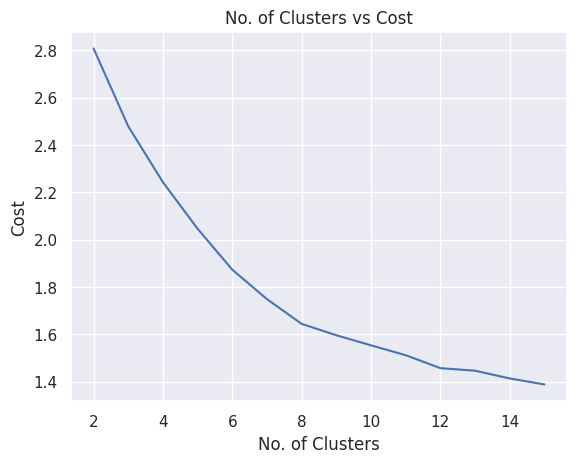

In [ ]:
#Finding the best K
k_list = [k for k in range(2, 16)]
cost_list = []

for k in k_list:
  min_J_Cost = float('inf')
  for _ in range(5):
    z, cluster_labels, J_Cost = k_means(train_X.to_numpy(), k)
    min_J_Cost =  min(min_J_Cost, J_Cost)
  cost_list.append(min_J_Cost)

plt.plot(k_list, cost_list)
plt.title('No. of Clusters vs Cost')
plt.xlabel('No. of Clusters')
plt.ylabel('Cost')
plt.show()

**Ideal Clusters**:

**8** looks like Ideal number of Clusters  

In [ ]:
k= 8
z, cluster_labels, J_Cost = k_means(train_X.to_numpy(),k)

print("Total Cost:", J_Cost)

Total Cost: 1.7135918073599692


In [ ]:
day_df['cluster'] = cluster_labels


display("day_df with cluster labels = ", day_df.head(10))

day_df_mod = day_df.copy()

# modifiying cataegorical data from numerical to
day_df_mod['season'] = day_df_mod['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
day_df_mod['weathersit'] = day_df_mod['weathersit'].map({1: 'clear', 2: 'mist', 3: 'snow', 4: 'rain'})
day_df_mod['mnth'] = day_df_mod['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
day_df_mod['weekday'] = day_df_mod['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
day_df_mod['yr'] = day_df_mod['yr'].map({0: '2011', 1: '2012'})

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_features = ['season', 'mnth', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']
cat_features_wcnt = categorical_features + ['cnt']
print("Cluster Data Interpretation")


print("Numerical Feature Interprtation")
for i in range(k):
  print("Cluster ", i)
  display(day_df_mod[day_df_mod['cluster'] == i][numerical_features].describe())

print("Categorical Feature Interprtation")
cat_features_df = pd.DataFrame()
for i in range(k):
  print("Cluster ", i)
  temp_df = day_df_mod[day_df_mod['cluster'] == i][categorical_features]

  for col in categorical_features:
    vals = temp_df[col].value_counts()
    maxVal= vals.idxmax()
    minVal = vals.idxmin()
    minValCount = vals.min()
    maxValCount = vals.max()

    summary = {
        'maxVal': maxVal,
        'minVal': minVal,
        'maxValCount': maxValCount,
        'minValCount': minValCount
    }

    # Combine the summary and the value counts into a new DataFrame column
    cat_features_df[col] = pd.Series(list(summary.values()),
                                     index=list(summary.keys()))
    # cat_features_df[col] = [maxVal, minVal, maxValCount, minValCount] + vals
  display(cat_features_df)

'day_df with cluster labels = '

instant      dteday season yr mnth holiday weekday workingday weathersit  \
0        1  2011-01-01      1  0    1       0       6          0          2   
1        2  2011-01-02      1  0    1       0       0          0          2   
2        3  2011-01-03      1  0    1       0       1          1          1   
3        4  2011-01-04      1  0    1       0       2          1          1   
4        5  2011-01-05      1  0    1       0       3          1          1   
5        6  2011-01-06      1  0    1       0       4          1          1   
6        7  2011-01-07      1  0    1       0       5          1          2   
7        8  2011-01-08      1  0    1       0       6          0          2   
8        9  2011-01-09      1  0    1       0       0          0          1   
9       10  2011-01-10      1  0    1       0       1          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  cluster  
0  0.344167  0.363625  0.805833   0.160446     331         654   985      7.0  
1  0.363478  0.353739  0.696087   0.248539     131         670   801      1.0  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349      1.0  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562      1.0  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600      1.0  
5  0.204348  0.233209  0.518261   0.089565      88        1518  1606      7.0  
6  0.196522  0.208839  0.498696   0.168726     148        1362  1510      7.0  
7  0.165000  0.162254  0.535833   0.266804      68         891   959      7.0  
8  0.138333  0.116175  0.434167   0.361950      54         768   822      1.0  
9  0.150833  0.150888  0.482917   0.223267      41        1280  1321      1.0

Cluster Data Interpretation
Numerical Feature Interprtation
Cluster  0


temp      atemp        hum  windspeed       casual   registered  \
count  92.000000  92.000000  92.000000  92.000000    92.000000    92.000000   
mean    0.563733   0.538158   0.649688   0.208196  1054.065217  3785.413043   
std     0.106007   0.091695   0.138295   0.074060   696.177693  1228.262591   
min     0.253043   0.250339   0.275833   0.074637   120.000000   907.000000   
25%     0.486042   0.475058   0.541458   0.148015   628.750000  2987.500000   
50%     0.579584   0.552394   0.673125   0.199007   773.000000  3725.500000   
75%     0.632500   0.595503   0.752708   0.264618  1417.500000  4541.250000   
max     0.775000   0.725383   0.880833   0.388067  3283.000000  6433.000000   

               cnt  
count    92.000000  
mean   4839.478261  
std    1459.007140  
min    1027.000000  
25%    3980.000000  
50%    4795.500000  
75%    6050.500000  
max    7641.000000

Cluster  1


temp      atemp        hum  windspeed       casual   registered  \
count  97.000000  97.000000  97.000000  97.000000    97.000000    97.000000   
mean    0.292511   0.290964   0.566923   0.216491   321.680412  2358.639175   
std     0.102148   0.098371   0.156668   0.080887   350.664237  1246.394318   
min     0.096522   0.098839   0.290000   0.045408     9.000000   472.000000   
25%     0.221739   0.234526   0.443333   0.161071   109.000000  1454.000000   
50%     0.285217   0.284075   0.522500   0.205717   203.000000  1871.000000   
75%     0.348333   0.351629   0.687917   0.253112   397.000000  3328.000000   
max     0.572500   0.548617   0.948261   0.417908  2207.000000  5315.000000   

               cnt  
count    97.000000  
mean   2680.319588  
std    1434.528070  
min     506.000000  
25%    1600.000000  
50%    2236.000000  
75%    3598.000000  
max    6312.000000

Cluster  2


temp      atemp        hum  windspeed       casual   registered  \
count  68.000000  68.000000  68.000000  68.000000    68.000000    68.000000   
mean    0.360675   0.361377   0.687023   0.175133   416.029412  3346.794118   
std     0.080377   0.076854   0.138062   0.082678   345.406141  1440.184416   
min     0.215833   0.220333   0.458333   0.046650     9.000000   432.000000   
25%     0.296459   0.293289   0.584063   0.102620   215.000000  2432.000000   
50%     0.353333   0.363625   0.684167   0.171338   335.000000  3570.000000   
75%     0.422708   0.423288   0.769583   0.233204   453.250000  4598.750000   
max     0.530000   0.524612   0.970417   0.350754  2290.000000  6055.000000   

               cnt  
count    68.000000  
mean   3762.823529  
std    1565.922330  
min     441.000000  
25%    2711.750000  
50%    3798.500000  
75%    5116.750000  
max    6852.000000

Cluster  3


temp      atemp        hum  windspeed       casual   registered  \
count  79.000000  79.000000  79.000000  79.000000    79.000000    79.000000   
mean    0.727610   0.676844   0.613540   0.167079  1174.063291  4474.734177   
std     0.048635   0.046462   0.099259   0.057424   519.560103  1219.309438   
min     0.630833   0.594704   0.373333   0.070283   467.000000  2367.000000   
25%     0.700833   0.645208   0.549583   0.129043   800.000000  3595.000000   
50%     0.726667   0.675525   0.623750   0.156717  1050.000000  4061.000000   
75%     0.764166   0.705823   0.680000   0.200256  1279.500000  5666.000000   
max     0.830000   0.794829   0.845833   0.347642  3065.000000  6790.000000   

               cnt  
count    79.000000  
mean   5648.797468  
std    1282.701710  
min    3574.000000  
25%    4615.500000  
50%    5302.000000  
75%    6887.000000  
max    8173.000000

Cluster  4


temp      atemp        hum  windspeed       casual   registered  \
count  70.000000  70.000000  70.000000  70.000000    70.000000    70.000000   
mean    0.543692   0.520889   0.707640   0.167106   971.128571  4334.828571   
std     0.098600   0.082990   0.118883   0.077798   654.019344  1629.018260   
min     0.318182   0.309909   0.467083   0.042304     2.000000    20.000000   
25%     0.484167   0.472849   0.630833   0.104944   569.500000  3296.500000   
50%     0.543750   0.528407   0.708958   0.151742   784.000000  4007.500000   
75%     0.607292   0.568970   0.791459   0.212931  1106.000000  5833.000000   
max     0.736667   0.708983   0.917083   0.398008  2613.000000  6946.000000   

               cnt  
count    70.000000  
mean   5305.957143  
std    1838.021356  
min      22.000000  
25%    4208.750000  
50%    4975.000000  
75%    7015.750000  
max    8227.000000

Cluster  5


temp       atemp         hum   windspeed       casual  \
count  112.000000  112.000000  112.000000  112.000000   112.000000   
mean     0.689293    0.640500    0.603248    0.179319  1291.580357   
std      0.086380    0.085323    0.125065    0.057082   650.783182   
min      0.459167    0.242400    0.305000    0.072146   226.000000   
25%      0.646042    0.597233    0.503125    0.140553   808.750000   
50%      0.698750    0.645856    0.595625    0.171956  1067.000000   
75%      0.741042    0.687030    0.704375    0.213923  1521.000000   
max      0.861667    0.840896    0.922500    0.375617  3410.000000   

        registered          cnt  
count   112.000000   112.000000  
mean   4448.928571  5740.508929  
std    1179.162940  1400.999842  
min     889.000000  1115.000000  
25%    3536.500000  4673.000000  
50%    4228.000000  5526.500000  
75%    5570.750000  7036.250000  
max    6541.000000  8294.000000

Cluster  6


temp       atemp         hum   windspeed       casual  \
count  106.000000  106.000000  106.000000  106.000000   106.000000   
mean     0.440742    0.426867    0.645573    0.181046   868.962264   
std      0.138969    0.123387    0.125036    0.084107   710.794243   
min      0.248333    0.226642    0.333478    0.022392    57.000000   
25%      0.324375    0.323848    0.555906    0.124376   325.000000   
50%      0.405833    0.404656    0.637708    0.167918   659.000000   
75%      0.561041    0.536470    0.717917    0.234624  1138.500000   
max      0.753333    0.702654    0.972500    0.422275  3160.000000   

        registered          cnt  
count   106.000000   106.000000  
mean   3913.311321  4782.273585  
std    1578.169527  1939.900044  
min     570.000000   627.000000  
25%    2775.500000  3374.000000  
50%    3698.000000  4762.500000  
75%    5120.500000  5943.750000  
max    6917.000000  8714.000000

Cluster  7


temp       atemp         hum   windspeed       casual  \
count  107.000000  107.000000  107.000000  107.000000   107.000000   
mean     0.354246    0.350732    0.593562    0.215061   617.317757   
std      0.121045    0.114291    0.167750    0.083540   679.367569   
min      0.059130    0.079070    0.000000    0.065929    15.000000   
25%      0.264583    0.255995    0.496250    0.159204   164.500000   
50%      0.346667    0.355425    0.567500    0.209571   331.000000   
75%      0.444584    0.439071    0.720878    0.251244   878.500000   
max      0.617500    0.578929    0.929167    0.507463  3252.000000   

        registered          cnt  
count   107.000000   107.000000  
mean   2785.056075  3402.373832  
std    1446.148116  1896.764189  
min     416.000000   431.000000  
25%    1510.500000  1727.000000  
50%    2570.000000  3163.000000  
75%    3816.500000  4449.500000  
max    5950.000000  8362.000000

Categorical Feature Interprtation
Cluster  0


season mnth    yr  holiday   weekday  workingday weathersit
maxVal       spring  may  2011        0    sunday           1      clear
minVal       winter  jan  2011        1  thursday           0       snow
maxValCount      92   37    46       89        26          63         48
minValCount       0    0    46        3         0          29          1

Cluster  1


season mnth    yr  holiday   weekday  workingday weathersit
maxVal       winter  jan  2012        0   tuesday           1      clear
minVal       summer  apr  2011        1  thursday           0       snow
maxValCount      92   37    49       92        26          68         68
minValCount       0    0    48        5         0          29          1

Cluster  2


season mnth    yr  holiday   weekday  workingday weathersit
maxVal         fall  nov  2011        0    sunday           1      clear
minVal       spring  jan  2011        1  thursday           0       snow
maxValCount      57   34    34       65        17          48         38
minValCount       0    0    34        3         0          20          6

Cluster  3


season mnth    yr  holiday   weekday  workingday weathersit
maxVal       summer  jul  2011        0   tuesday           1      clear
minVal       winter  jan  2012        1  thursday           0       snow
maxValCount      79   36    40       77        21          57         64
minValCount       0    0    39        2         0          22          0

Cluster  4


season mnth    yr  holiday   weekday  workingday weathersit
maxVal         fall  oct  2012        0    sunday           1      clear
minVal       winter  jan  2011        1  thursday           0       snow
maxValCount      46   37    36       66        18          48         39
minValCount       0    0    34        4         0          22          6

Cluster  5


season mnth    yr  holiday   weekday  workingday weathersit
maxVal       summer  jun  2012        0  thursday           1      clear
minVal       winter  jan  2011        1    sunday           0       snow
maxValCount      65   35    57      112        35          78         86
minValCount       0    0    55        0         0          34          1

Cluster  6


season mnth    yr  holiday   weekday  workingday weathersit
maxVal         fall  dec  2011        0  saturday           1      clear
minVal       spring  jan  2012        1    sunday           0       snow
maxValCount      75   28    54      103        36          67         62
minValCount       0    0    52        3         0          39          2

Cluster  7


season mnth    yr  holiday   weekday  workingday weathersit
maxVal       winter  mar  2011        0  saturday           1      clear
minVal       summer  may  2012        1    sunday           0       snow
maxValCount      67   32    54      106        35          71         58
minValCount       0    0    53        1         0          36          4

<Figure size 1200x800 with 0 Axes>

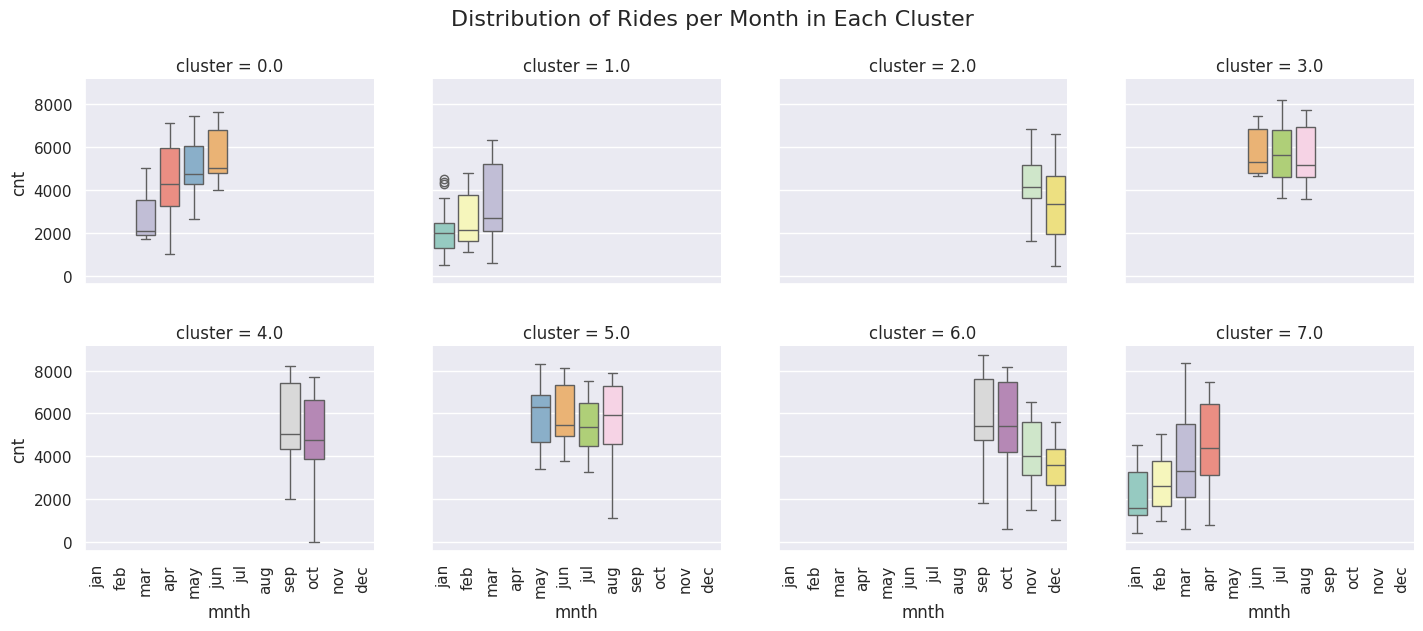

In [ ]:
plt.figure(figsize=(12, 8))
grid = sn.FacetGrid(data=day_df_mod, col='cluster',height=3, aspect=1.2, col_wrap=4)

grid.map(sn.boxplot,'mnth', 'cnt', order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = month_palette)

# # grid.fig.suptitle('Count of Each Weekday in Each Cluster', y=1.05, fontsize=16

for i, ax in enumerate(grid.axes.flat):
  if i>3:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()
grid.fig.subplots_adjust(hspace=0.3, wspace=0.2)
grid.fig.suptitle('Distribution of Rides per Month in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()

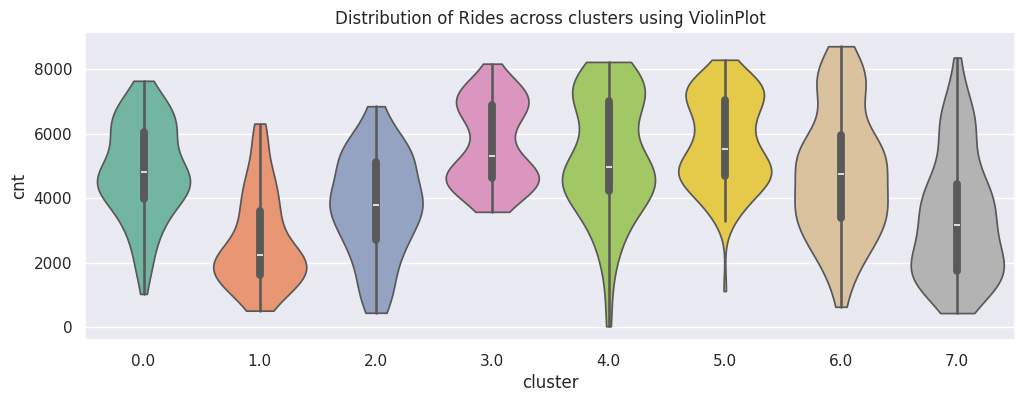

In [ ]:
plt.figure(figsize=(12, 4))

sn.violinplot(day_df_mod, x='cluster', y='cnt', cut =0, palette=custom_palette)
plt.title("Distribution of Rides across clusters using ViolinPlot")
plt.show()

## Observation

* Median Ride Count accross the cluster varies which is good for Identifying the Ride Count

<Figure size 1200x800 with 0 Axes>

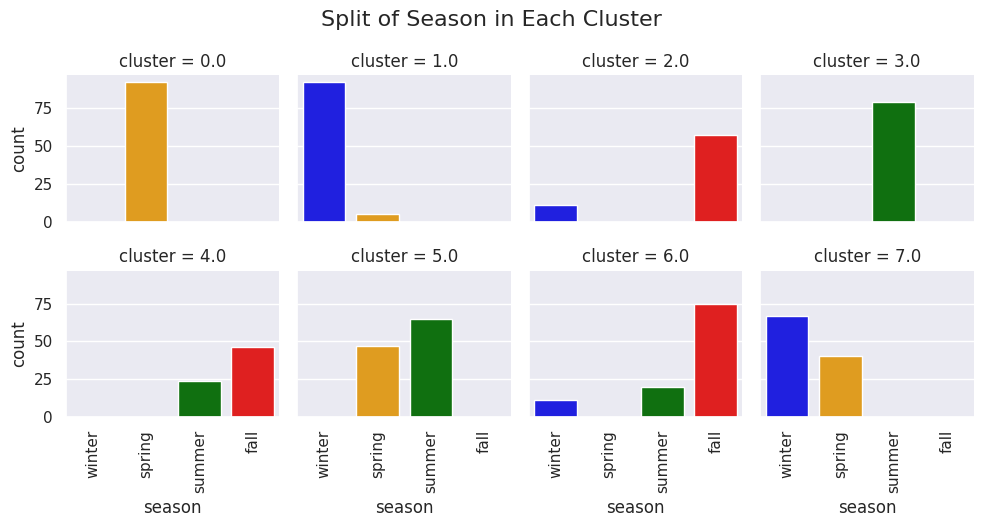

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size if needed
grid = sn.FacetGrid(data=day_df_mod, col='cluster', height=2.5, aspect=1, col_wrap=4)

# Map barplot to the grid
grid.map(sn.countplot,'season', palette=season_palette)

# grid.fig.suptitle('Count of Each Weekday in Each Cluster', y=1.05, fontsize=16)
for i, ax in enumerate(grid.axes.flat):
  if i>3:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate by 45 degrees

# Adjust layout to avoid overlap
plt.tight_layout()
# grid.fig.subplots_adjust(hspace=0.2, wspace=0.2)
grid.fig.suptitle('Split of Season in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

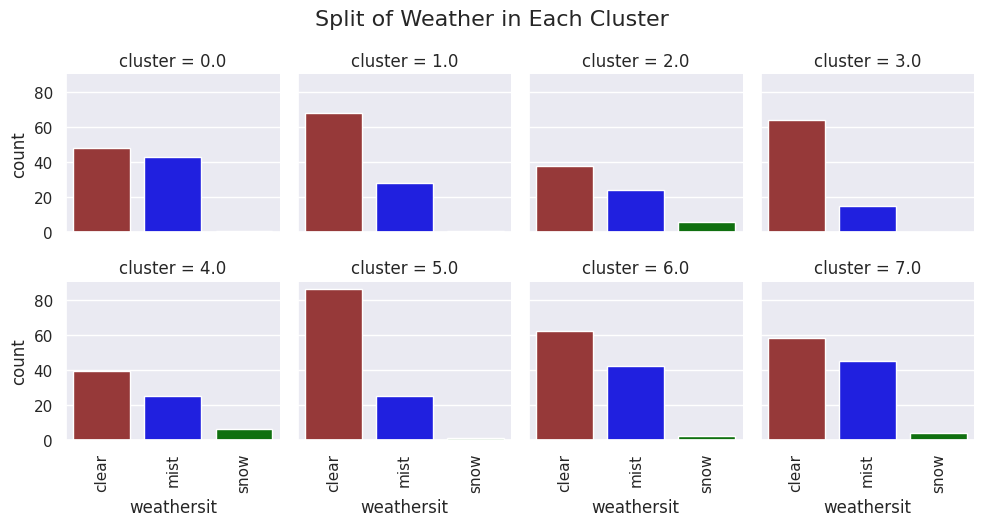

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size if needed
grid = sn.FacetGrid(data=day_df_mod, col='cluster', height=2.5, aspect=1, col_wrap=4)

# Map barplot to the grid
grid.map(sn.countplot,'weathersit', palette = weather_palette)

# grid.fig.suptitle('Count of Each Weekday in Each Cluster', y=1.05, fontsize=16)
for i, ax in enumerate(grid.axes.flat):
  if i>3:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate by 45 degrees

# Adjust layout to avoid overlap
plt.tight_layout()
# grid.fig.subplots_adjust(hspace=0.2, wspace=0.2)
grid.fig.suptitle('Split of Weather in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()

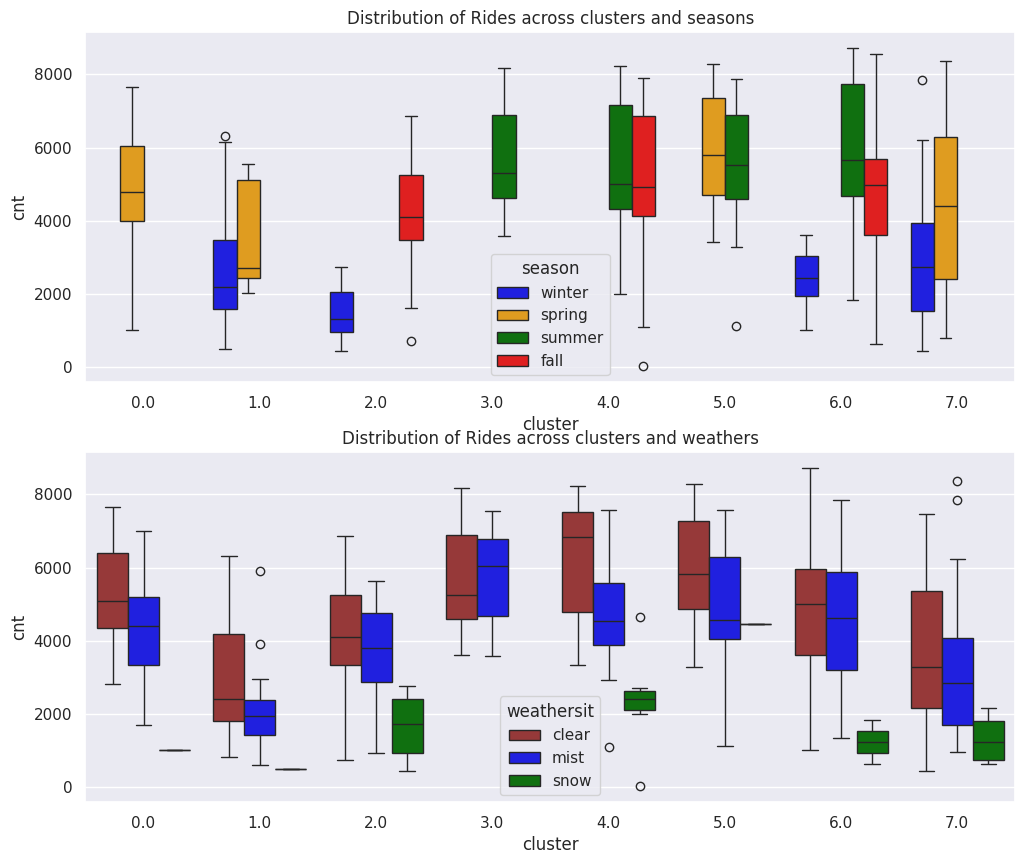

In [ ]:
fig , axes = plt.subplots(2,1, figsize=(12, 10))

custom_palette = sn.color_palette("Set2", 8)
sn.boxplot(day_df_mod, x='cluster', y='cnt', hue='season', palette=season_palette, ax = axes[0])
axes[0].set_title("Distribution of Rides across clusters and seasons")
# plt.title("Distribution of Rides across clusters and seasons")

sn.boxplot(day_df_mod, x='cluster', y='cnt', hue='weathersit', palette = weather_palette, ax = axes[1])
axes[1].set_title("Distribution of Rides across clusters and weathers")

plt.show()

<Figure size 1200x800 with 0 Axes>

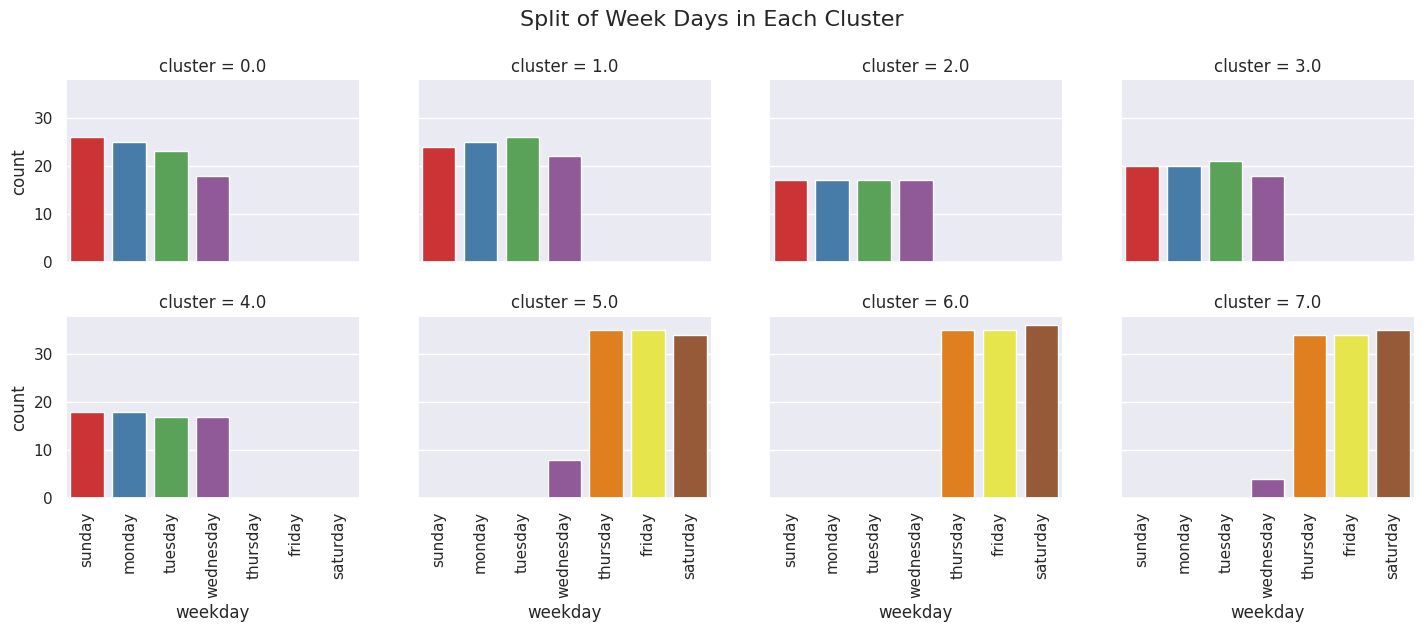

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size if needed
grid = sn.FacetGrid(data=day_df_mod, col='cluster', height=3, aspect=1.2, col_wrap=4)

# Map barplot to the grid
pl1 = grid.map(sn.countplot,'weekday', order=['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'], palette = weekday_palette)

# grid.fig.suptitle('Count of Each Weekday in Each Cluster', y=1.05, fontsize=16)
for i, ax in enumerate(grid.axes.flat):
  if i>3:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate by 45 degrees

# Adjust layout to avoid overlap
plt.tight_layout()
grid.fig.subplots_adjust(hspace=0.3, wspace=0.2)
grid.fig.suptitle('Split of Week Days in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

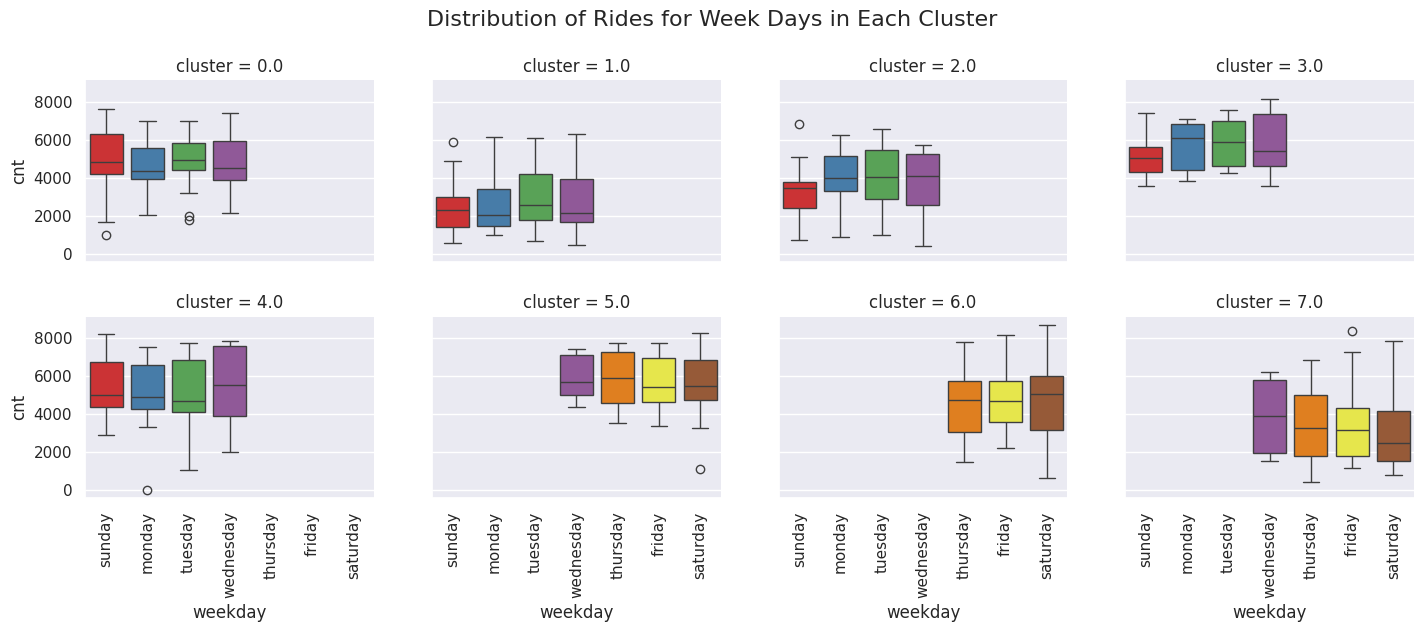

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size if needed
grid = sn.FacetGrid(data=day_df_mod, col='cluster', height=3, aspect=1.2, col_wrap=4)

# Map barplot to the grid
pl1 = grid.map(sn.boxplot,'weekday', 'cnt', order=['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'], palette = weekday_palette)

# grid.fig.suptitle('Count of Each Weekday in Each Cluster', y=1.05, fontsize=16)
for i, ax in enumerate(grid.axes.flat):
  if i>3:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate by 45 degrees

# Adjust layout to avoid overlap
plt.tight_layout()
grid.fig.subplots_adjust(hspace=0.3, wspace=0.2)
grid.fig.suptitle('Distribution of Rides for Week Days in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()



<Figure size 1200x800 with 0 Axes>

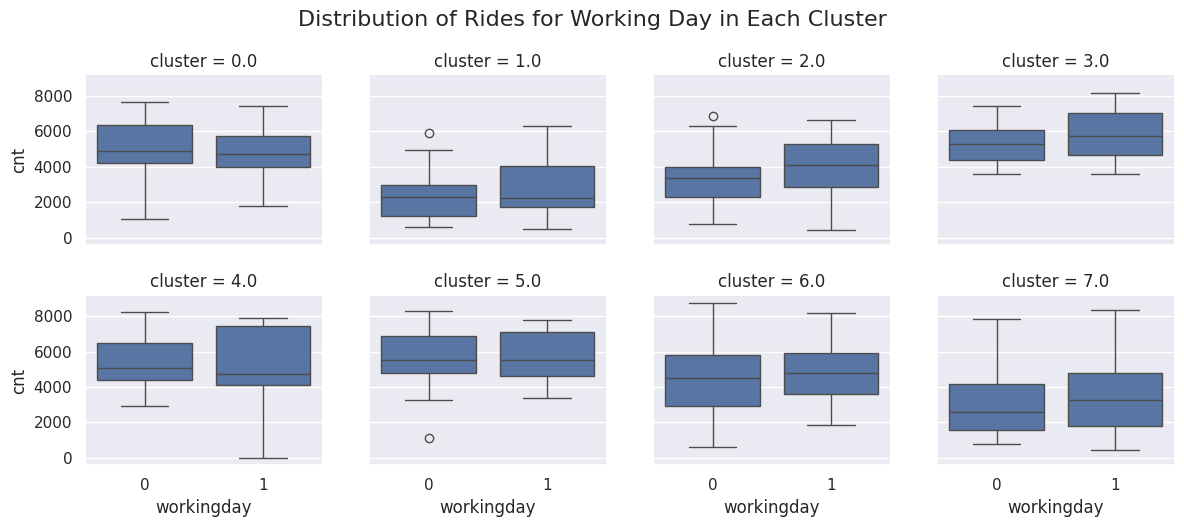

In [ ]:
plt.figure(figsize=(12, 8))
grid = sn.FacetGrid(data=day_df_mod, col='cluster', height=2.5, aspect=1.2, col_wrap=4)

# Map barplot to the grid
grid.map(sn.boxplot,'workingday', 'cnt')

# Adjust layout to avoid overlap
plt.tight_layout()
grid.fig.subplots_adjust(hspace=0.3, wspace=0.2)
grid.fig.suptitle('Distribution of Rides for Working Day in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

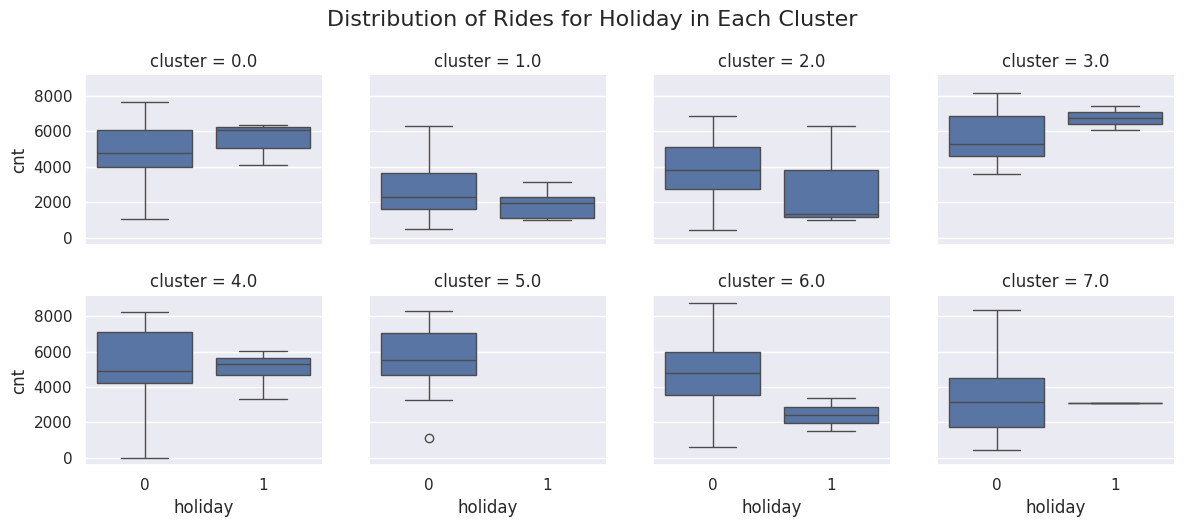

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size if needed
grid = sn.FacetGrid(data=day_df_mod, col='cluster', height=2.5, aspect=1.2, col_wrap=4)

# Map barplot to the grid
grid.map(sn.boxplot,'holiday', 'cnt')

# Adjust layout to avoid overlap
plt.tight_layout()
grid.fig.subplots_adjust(hspace=0.3, wspace=0.2)
grid.fig.suptitle('Distribution of Rides for Holiday in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

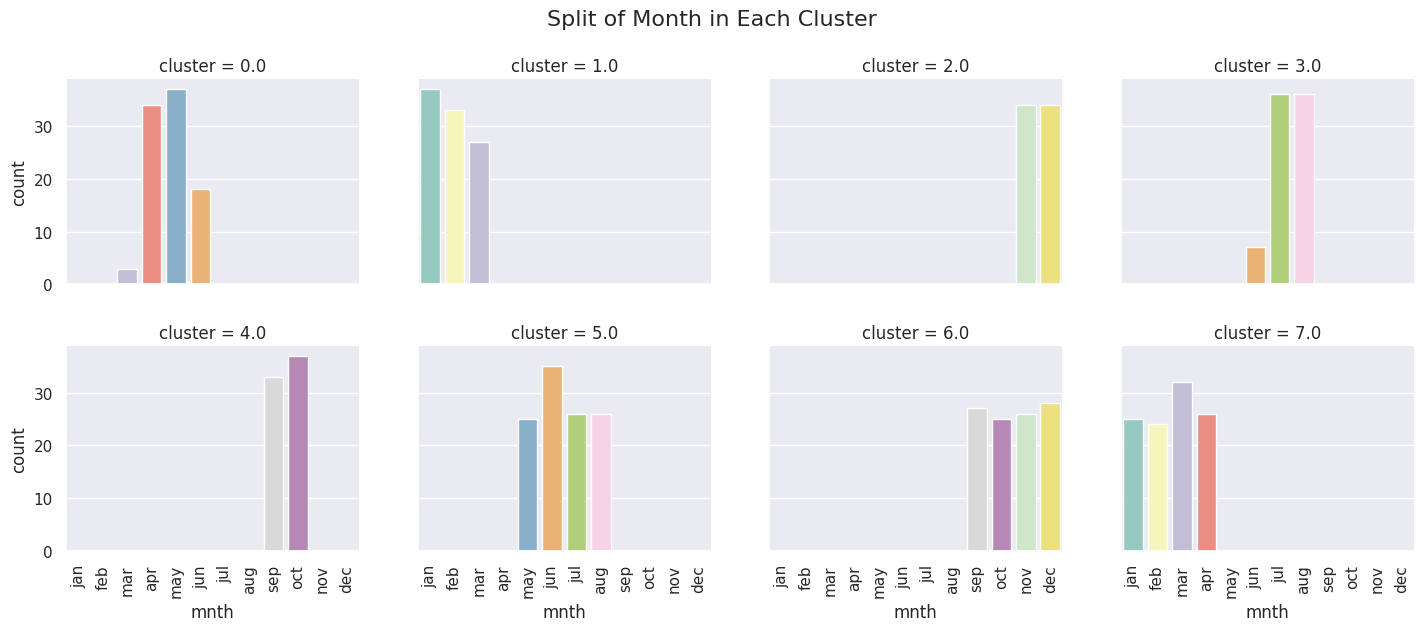

In [ ]:
plt.figure(figsize=(12, 8))
grid = sn.FacetGrid(data=day_df_mod, col='cluster',height=3, aspect=1.2, col_wrap=4)

grid.map(sn.countplot,'mnth', order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = month_palette)

# # grid.fig.suptitle('Count of Each Weekday in Each Cluster', y=1.05, fontsize=16

for i, ax in enumerate(grid.axes.flat):
  if i>3:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()
grid.fig.subplots_adjust(hspace=0.3, wspace=0.2)
grid.fig.suptitle('Split of Month in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

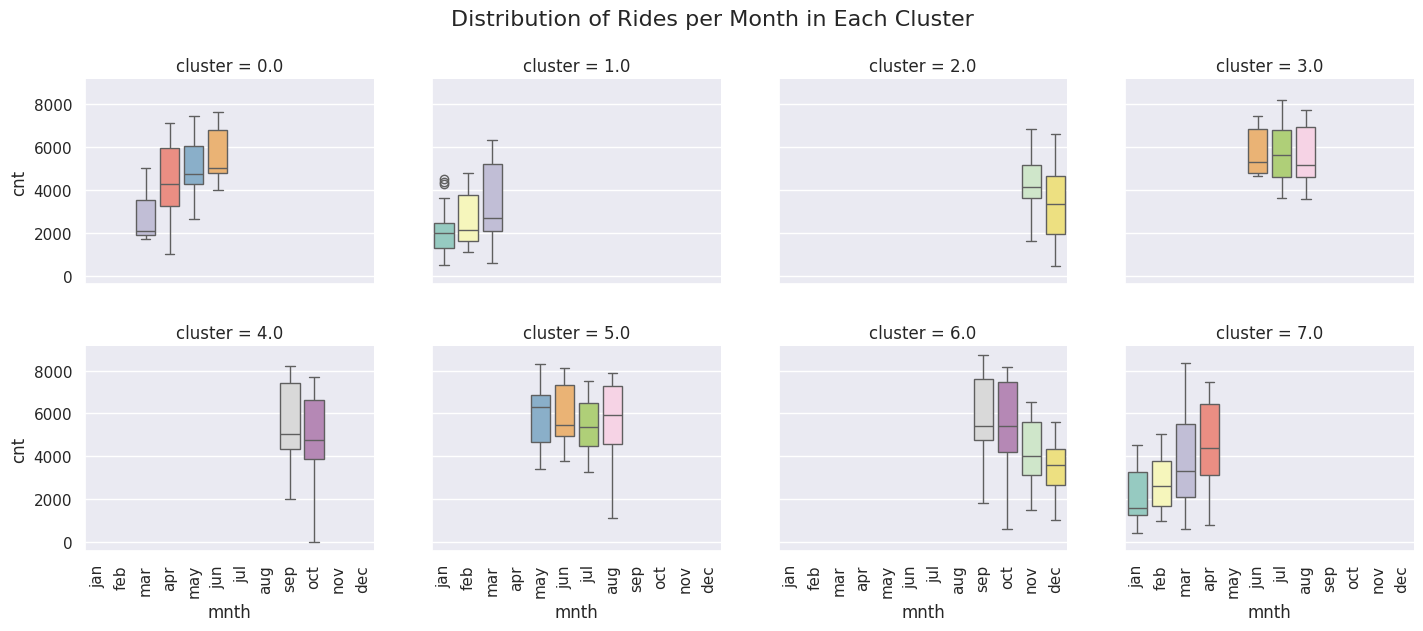

In [ ]:
plt.figure(figsize=(12, 8))
grid = sn.FacetGrid(data=day_df_mod, col='cluster',height=3, aspect=1.2, col_wrap=4)

grid.map(sn.boxplot,'mnth', 'cnt', order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = month_palette)

# # grid.fig.suptitle('Count of Each Weekday in Each Cluster', y=1.05, fontsize=16

for i, ax in enumerate(grid.axes.flat):
  if i>3:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()
grid.fig.subplots_adjust(hspace=0.3, wspace=0.2)
grid.fig.suptitle('Distribution of Rides per Month in Each Cluster', y=1.05, fontsize=16)
# Show the plot
plt.show()

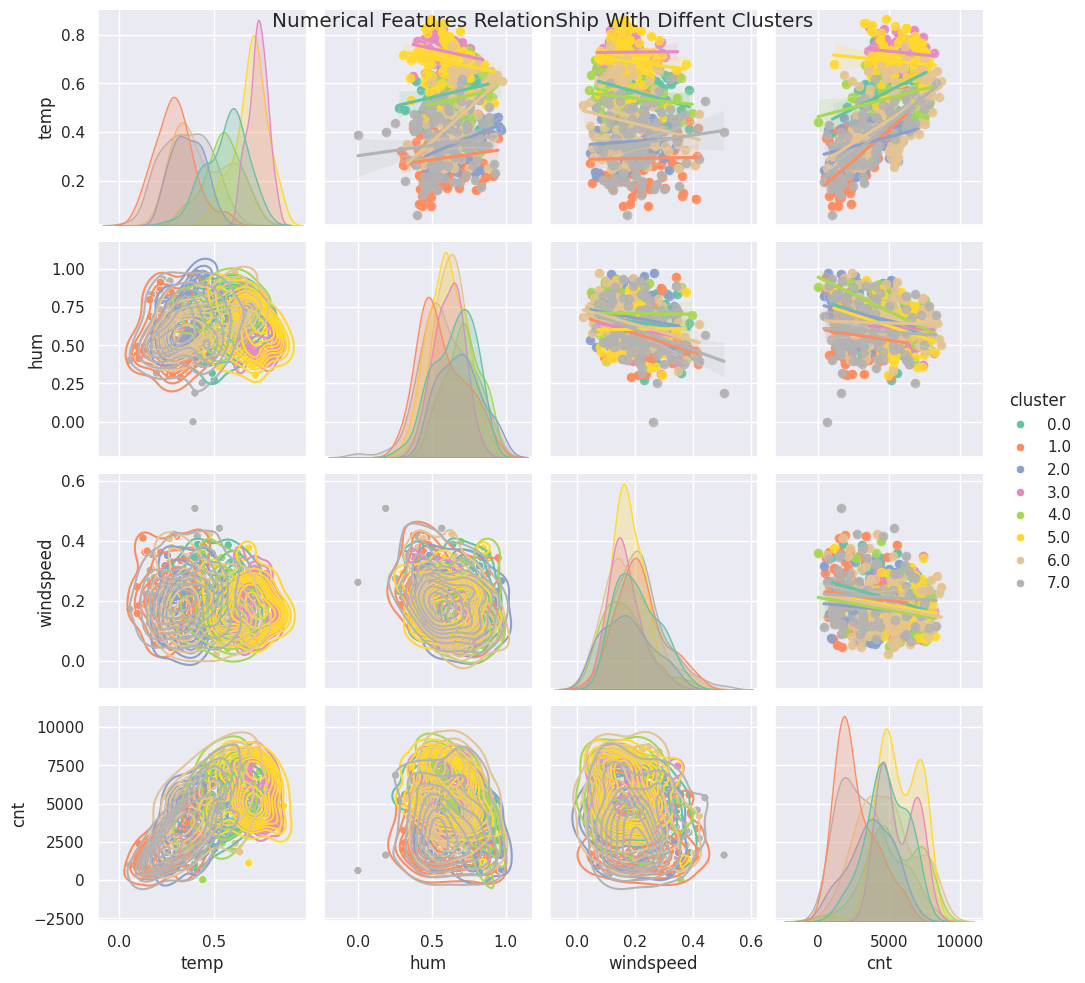

In [ ]:
g =sn.pairplot(day_df_mod, diag_kind='kde', vars=['temp', 'hum', 'windspeed','cnt'], hue= 'cluster', palette=custom_palette)
g.map_upper(sn.regplot)
g.map_lower(sn.kdeplot)
g.fig.suptitle("Numerical Features RelationShip With Diffent Clusters")
g.savefig("numericalPairPlot.png")
plt.show()

## Observation

* Cluster Seems to be most seprable for these Individual features Temp, Ride Count.

* Few Clusters of for these feature combination seems seprable (Temp-Hum), (Temp -Hum), (Temp - WindSpeed), (Count -Temp), (Count - Hum), (Count - WindSpeed)

In [ ]:
def representative_vector(df, cluster_col, numerical, categorical ):

    # Group by the cluster column
    grouped = df.groupby(cluster_col)

    rep_vectors = {}

    for cluster, group in grouped:
        rep_vector = {}

        for col in numerical:
            rep_vector[col] = group[col].mean()


        for col in categorical:
            rep_vector[col] = group[col].mode()[0]  # Take the first mode in case of multiple modes


        rep_vectors[cluster] = rep_vector

    # Convert the representative vectors into a DataFrame
    rep_df = pd.DataFrame.from_dict(rep_vectors, orient='index')

    return rep_df

# Find the representative vectors
rep_df = representative_vector(day_df_mod, 'cluster', numerical, categorical)
print("Representative Vectors of Each Cluster")
display(rep_df)

Representative Vectors of Each Cluster


temp       hum  windspeed          cnt  season mnth    yr  holiday  \
0.0  0.563733  0.649688   0.208196  4839.478261  spring  may  2011        0   
1.0  0.292511  0.566923   0.216491  2680.319588  winter  jan  2012        0   
2.0  0.360675  0.687023   0.175133  3762.823529    fall  nov  2011        0   
3.0  0.727610  0.613540   0.167079  5648.797468  summer  jul  2011        0   
4.0  0.543692  0.707640   0.167106  5305.957143    fall  oct  2012        0   
5.0  0.689293  0.603248   0.179319  5740.508929  summer  jun  2012        0   
6.0  0.440742  0.645573   0.181046  4782.273585    fall  dec  2011        0   
7.0  0.354246  0.593562   0.215061  3402.373832  winter  mar  2011        0   

      weekday  workingday weathersit  
0.0    sunday           1      clear  
1.0   tuesday           1      clear  
2.0    sunday           1      clear  
3.0   tuesday           1      clear  
4.0    sunday           1      clear  
5.0  thursday           1      clear  
6.0  saturday           1      clear  
7.0  saturday           1      clear

##Observation


1. High Ride Count Features
   - temp
     - 0.57 - 0.69
   - hum
      - 0.59 -.65
   -windspeed
    - 0.16 - 0.19
   - season
    - spring/ summer
   - month
    - my/ jun/ august/ september
   - weekday
    - tuesday/ wednesday/ friday/ saturday/

   - Sub-item B
2. Low Ride Count Features
    - temp
     - 0.29 - 0.32
    - hum
      - 0.56 -.59
    -windspeed
     - 0.21 - 0.22
    - season
      - winter
    - month
      - jan/ feb/ march
    - weekday
      - thursday/sunday
   

#Aditya
#Checking correlation



In [ ]:
calculate_correlation_matrix(hour_df)

   instant       temp      atemp        hum  windspeed     casual registered        cnt 
      1.00       0.14       0.14       0.01      -0.07       0.16       0.28       0.28 
      0.14       1.00       0.99      -0.07      -0.02       0.46       0.34       0.40 
      0.14       0.99       1.00      -0.05      -0.06       0.45       0.33       0.40 
      0.01      -0.07      -0.05       1.00      -0.29      -0.35      -0.27      -0.32 
     -0.07      -0.02      -0.06      -0.29       1.00       0.09       0.08       0.09 
      0.16       0.46       0.45      -0.35       0.09       1.00       0.51       0.69 
      0.28       0.34       0.33      -0.27       0.08       0.51       1.00       0.97 
      0.28       0.40       0.40      -0.32       0.09       0.69       0.97       1.00 


In [ ]:
corr = hour_df.select_dtypes(include=['float64', 'int64']).corr()

<Axes: >

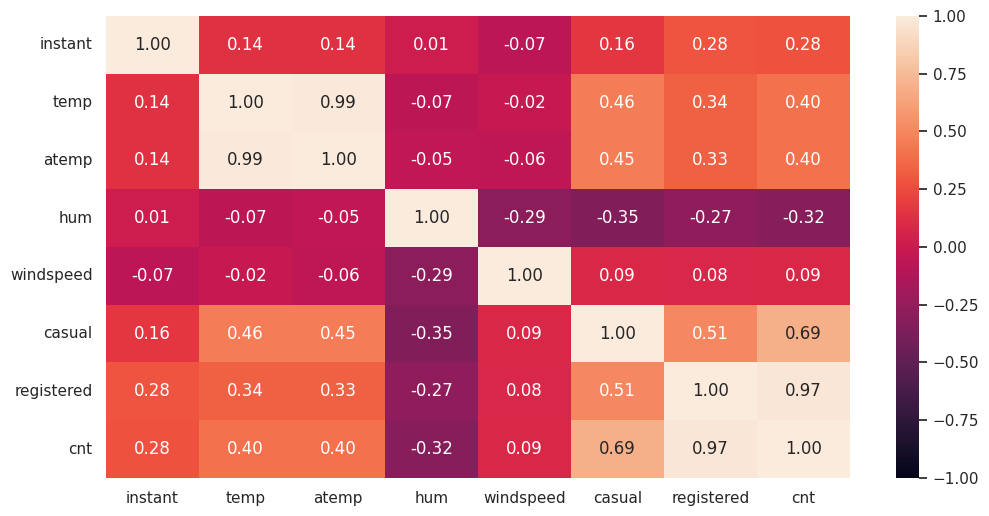

In [ ]:
plt.figure(figsize=(12,6))
sn.heatmap(corr,annot=True,vmin=-1, vmax=1,fmt=".2f")

#Notes from correlation plot
1. temp and atemp are highly correlated
2. seasons and months are also highly correlated
3. registered and casual should be remove as they are highly dependent on cnt
**Solution:**<br>
we need to remove either one these columns or add the beta*I while finding optimal

#Other observations
1. If it is humid people don't prefer taking our bikes

#Time for some plots

Calculating box plots for numerical columns

In [ ]:
def plot_numerical_columns(idx,column_name):
  color = ['red','blue','green']
  sn.boxplot(x=column_name,data=hour_df,orient='y',fill=False,width=.5,ax=axes[idx],color = color[idx])
  axes[idx].set_title(str.capitalize(column_name)+' box plot')

Lot of outliers in Windspeed compared to humidity (outlier only occurs when when it is 0) and no outlier in atemp

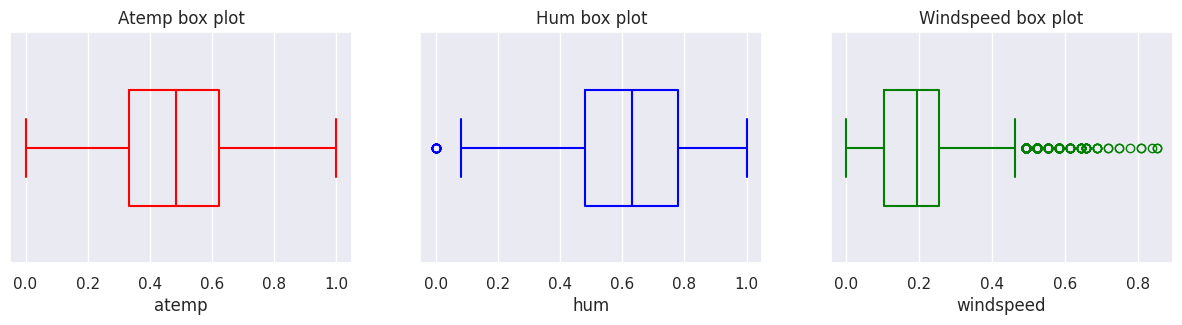

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
plot_numerical_columns(0,"atemp")
plot_numerical_columns(1,"hum")
plot_numerical_columns(2,"windspeed")

#Preprocessing

**We need to perform scaling on our data. There are 2 major ways to scale**
1. Min Max scaling [Normalization]
<br>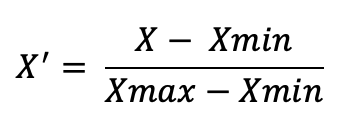

2. Z-Score [Standardization]
<br>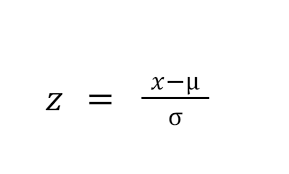


It doesn't make sense to scale categorical values and all other values are already normalized

In [ ]:
drop_columns = ['instant','dteday','workingday','casual','registered','temp']
hour_df.drop(drop_columns,axis=1,inplace=True)
hour_df.head()

season yr mnth hr holiday weekday weathersit   atemp   hum  windspeed  cnt
0      1  0    1  0       0       6          1  0.2879  0.81        0.0   16
1      1  0    1  1       0       6          1  0.2727  0.80        0.0   40
2      1  0    1  2       0       6          1  0.2727  0.80        0.0   32
3      1  0    1  3       0       6          1  0.2879  0.75        0.0   13
4      1  0    1  4       0       6          1  0.2879  0.75        0.0    1

In [ ]:
upcategoricalcolumns = check_categorical_columns(hour_df)
hour_df1 = OneHotEncode(hour_df, upcategoricalcolumns)

In [ ]:
hour_df1.head()

atemp   hum  windspeed  cnt  season_1  season_2  season_3  season_4  yr_0  \
0  0.2879  0.81        0.0   16         1         0         0         0     1   
1  0.2727  0.80        0.0   40         1         0         0         0     1   
2  0.2727  0.80        0.0   32         1         0         0         0     1   
3  0.2879  0.75        0.0   13         1         0         0         0     1   
4  0.2879  0.75        0.0    1         1         0         0         0     1   

   yr_1  ...  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0     0  ...          0          0          0          0          0   
1     0  ...          0          0          0          0          0   
2     0  ...          0          0          0          0          0   
3     0  ...          0          0          0          0          0   
4     0  ...          0          0          0          0          0   

   weekday_5  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0          0             1             0             0             0  
1          0             1             0             0             0  
2          0             1             0             0             0  
3          0             1             0             0             0  
4          0             1             0             0             0  

[5 rows x 59 columns]

Splitting into Train and Test

In [ ]:
X = hour_df1.drop('cnt',axis=1)
Y = hour_df1['cnt']
X = np.array(X)
Y = np.array(Y)
X = np.hstack((X,np.ones((X.shape[0],1))))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#Linear Regression

In [ ]:
class LinearRegression:
  def __init__(self):
    pass

  @staticmethod
  def optimal_weights_least_squares(X, Y):

      XTX = X.T @ X + 0.5 * np.eye(X.shape[1])
      XTX_inv = np.linalg.inv(XTX)
      XTY = X.T @ Y

      weights = XTX_inv @ XTY

      return weights

  @staticmethod
  def predict(X,weights):
      return X @ weights

  @staticmethod
  def ae(Y,Y_pred):
      return np.mean(abs(Y-Y_pred))

Finding Optimum Weights using Least Squares Solution<br>
The formula can be derived 3 ways
1. Minimizing the quadratic equation
2. Using Moore Penrose Psuedo Inverse
3. Using Projection

In [ ]:
weights = LinearRegression.optimal_weights_least_squares(X_train,Y_train)

In [ ]:
Y_train_pred = LinearRegression.predict(X_train,weights)

In [ ]:
train_avg_error = LinearRegression.ae(Y_train,Y_train_pred)
print("Average Training Error : ",train_avg_error)

Average Training Error :  75.6154063642829


In [ ]:
Y_test_pred = LinearRegression.predict(X_test,weights)

In [ ]:
test_avg_error = LinearRegression.ae(Y_test,Y_test_pred)
print("Average Testing Error : ",test_avg_error)

Average Testing Error :  74.17188970918775


In [ ]:
errors = pd.DataFrame(Y_test_pred - Y_test,columns=['errors'])

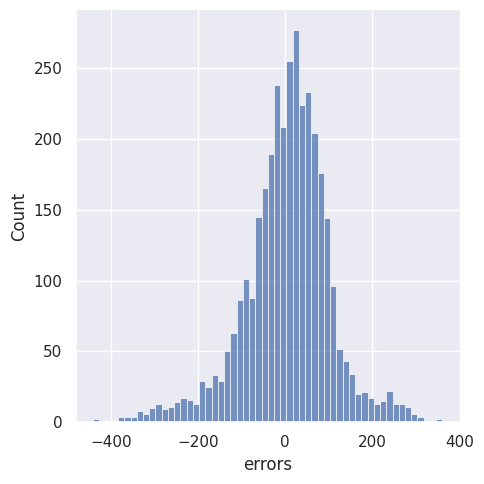

In [ ]:
sn.displot(data=errors, x="errors", kind='hist')

Seeing actual Value of one of the Sample

In [ ]:
x_sample,y_sample = X[6833],Y[6833]
predict_one_off = LinearRegression.predict(x_sample,weights)
print("Y-sample : ",y_sample,"\nPredicted Value : ",predict_one_off)

Y-sample :  309 
Predicted Value :  238.9630386398543


Checking if my model is better than 50% or worse than 50% to see wether should I apply ensemble methods

In [ ]:
mean_prediction = Y_test.mean()
baseline_mae = LinearRegression.ae(Y_test, [mean_prediction]*len(Y_test))
print("Baseline MAE : ",baseline_mae)

Baseline MAE :  138.8140591873786


Our model is better than baseline model but is not much of an improvement

In [ ]:
percentage_better = (abs(baseline_mae - test_avg_error)/baseline_mae) * 100
print("Our model is",round(percentage_better,2),"% than just predicting the mean")

Our model is 46.57 % than just predicting the mean


If it was atleast 50% better we could have choose forward to go with ensembling but now it doesn't make sense as model is not that better<br>
I could have gone back and applied regularization but since data is not definitely overfitting what's the use of applying regularization

#Polynomial Regression

The idea is try different powers ranging from power 1-10 and plot and select the one with least absolute error

In [ ]:
def generate_polynomial_features(X, degree):

    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    X_poly = np.hstack((X_poly,np.ones((X_poly.shape[0],1))))
    return X_poly

Testing the shapes of our data

In [ ]:
X_poly = hour_df1.drop('cnt',axis=1)
Y_poly = hour_df1['cnt']
X_poly = np.array(X_poly)
Y_poly = np.array(Y_poly)

In [ ]:
degree = 11
ae_list = {}
for i in range(1,degree):
  print("Power",i)
  X_poly_interaction = generate_polynomial_features(X_poly, i)
  print(X_poly_interaction.shape)

  X_train,X_test,Y_train,Y_test = train_test_split(X_poly_interaction,Y_poly,test_size=0.2,random_state=42)

  weights = LinearRegression.optimal_weights_least_squares(X_train,Y_train)
  Y_test_pred = LinearRegression.predict(X_test,weights)

  train_avg_error = LinearRegression.ae(Y_test,Y_test_pred)
  ae_list[i] = train_avg_error
  print("Average Training Error : ",train_avg_error)

Power 1
(17379, 59)
Average Training Error :  74.17188970918775
Power 2
(17379, 117)
Average Training Error :  74.14795965958172
Power 3
(17379, 175)
Average Training Error :  73.9859327519521
Power 4
(17379, 233)
Average Training Error :  73.8194267541315
Power 5
(17379, 291)
Average Training Error :  73.72752846992289
Power 6
(17379, 349)
Average Training Error :  73.6977934477203
Power 7
(17379, 407)
Average Training Error :  73.68723380294996
Power 8
(17379, 465)
Average Training Error :  73.68846510222001
Power 9
(17379, 523)
Average Training Error :  73.69190087069049
Power 10
(17379, 581)
Average Training Error :  73.69178930085053


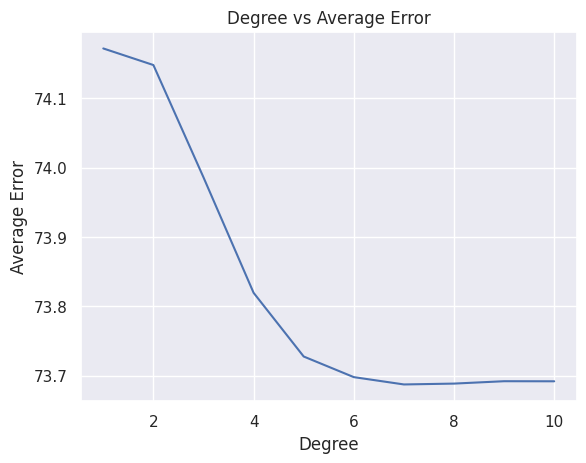

In [ ]:
x = list(ae_list.keys())
y = list(ae_list.values())
plt.xlabel("Degree")
plt.ylabel("Average Error")
plt.title("Degree vs Average Error")
plt.plot(x,y)

In [ ]:
X_poly_6 = generate_polynomial_features(X_poly,6)
print(X_poly_6.shape)

(17379, 349)


In [ ]:
X_train_poly_6,X_test_poly_6,Y_train_poly_6,Y_test_poly_6 = train_test_split(X_poly_6,Y_poly,test_size=0.2,random_state=42)

In [ ]:
print(X_train_poly_6.shape)
print(X_test_poly_6.shape)
print(Y_train_poly_6.shape)
print(Y_test_poly_6.shape)

(13903, 349)
(3476, 349)
(13903,)
(3476,)


In [ ]:
weights_poly_6 = LinearRegression.optimal_weights_least_squares(X_train_poly_6,Y_train_poly_6)
Y_test_pred_poly_6 = LinearRegression.predict(X_test_poly_6,weights_poly_6)
train_avg_error_poly_6 = LinearRegression.ae(Y_test_poly_6,Y_test_pred_poly_6)
print("Average Training Error : ",train_avg_error_poly_6)
y_pred = np.squeeze(Y_train_poly_6)
Y_test_pred_poly_6 = np.squeeze(Y_test_pred_poly_6)
r2score=r2_score(Y_test_poly_6, Y_test_pred_poly_6)
print("R2 Score : ",r2score)

Average Training Error :  73.6977934477203
R2 Score :  0.6903324883924069


In [ ]:
percentage_better = (abs(baseline_mae - train_avg_error_poly_6)/baseline_mae) * 100
print("Our model is",round(percentage_better,2),"% than just predicting the mean")

Our model is 46.91 % than just predicting the mean


#NODE OF DECSISION TREE

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red

        # for leaf node
        self.value = value




#Decision Tree


In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)

        # Split until stopping conditions are met
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)

            # Check if variance reduction is positive
            if best_split and best_split["var_red"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["var_red"])

        # Compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        best_split = None
        max_var_red = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)

                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_var_red = self.variance_reduction(y, left_y, right_y)

                    # Print the current variance reduction being calculated
                    #print(f"Variance reduction for feature {feature_index} at threshold {threshold}: {curr_var_red}")

                    # Update the best split if needed
                    if curr_var_red > max_var_red:
                        best_split = {
                            "feature_index": feature_index,
                            "threshold": threshold,
                            "dataset_left": dataset_left,
                            "dataset_right": dataset_right,
                            "var_red": curr_var_red
                        }
                        max_var_red = curr_var_red

        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        return np.mean(Y)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)
        else:
            print(f"X_{tree.feature_index} <= {tree.threshold} ? {tree.var_red}")
            print(f"{indent}left:", end="")
            self.print_tree(tree.left, indent + indent)
            print(f"{indent}right:", end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def predict(self, X):
        ''' function to predict a single data point '''
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

#RANDOM FOREST

In [ ]:
class RandomForestRegressor():
    def __init__(self, num_trees=10, min_samples_split=2, max_depth=2):
        self.num_trees = num_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = [DecisionTreeRegressor(min_samples_split=self.min_samples_split, max_depth=self.max_depth) for _ in range(self.num_trees)]

    def fit(self, X, y):
        for tree in self.trees:
            indices = np.random.choice(X.shape[0], size = int(X.shape[0]*0.5), replace=True)
            X_sampled, y_sampled = X[indices], y[indices]
            tree.fit(X_sampled, y_sampled)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0), predictions


#Decision Tree Training and Testing

In [ ]:
#drop_columns = ['instant','dteday','workingday','casual','registered','temp']
#hour_df.drop(drop_columns,axis=1,inplace=True)
hour_df.head()

season yr mnth hr holiday weekday weathersit   atemp   hum  windspeed  cnt
0      1  0    1  0       0       6          1  0.2879  0.81        0.0   16
1      1  0    1  1       0       6          1  0.2727  0.80        0.0   40
2      1  0    1  2       0       6          1  0.2727  0.80        0.0   32
3      1  0    1  3       0       6          1  0.2879  0.75        0.0   13
4      1  0    1  4       0       6          1  0.2879  0.75        0.0    1

In [ ]:
X_DT,Y_DT = hour_df.drop('cnt',axis=1).values,hour_df.loc[:,"cnt"].values.reshape(-1,1)

In [ ]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_DT,Y_DT, test_size=0.2, random_state=42)

In [ ]:
X_DT,Y_DT = hour_df.drop('cnt',axis=1).values,hour_df.loc[:,"cnt"].values.reshape(-1,1)
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_DT,Y_DT, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(min_samples_split=2, max_depth=10)
regressor.fit(x_train_dt,y_train_dt)
#regressor1.print_tree()
y_pred = regressor.predict(x_test_dt)
y_pred = np.array(y_pred)
y_pred_sq = np.squeeze(y_pred)
y_test_sq = np.squeeze(y_test_dt)

r2score = r2_score(y_pred_sq, y_test_sq)
print("***************************************************")
print("The r2 score of Decision Tree on Test Data set is: ",r2score)

***************************************************
The r2 score of Decision Tree on Test Data set is:  0.8684498492375688


In [ ]:
test_avg_error = LinearRegression.ae(y_pred,y_test_dt)
print(test_avg_error)

184.93281351375006


In [ ]:
rfr = RandomForestRegressor(num_trees=10, max_depth=10)
rfr.fit(x_train_dt,y_train_dt)
y_pre, y_pre_total = rfr.predict(x_test_dt)

In [ ]:
y_pre = np.array(y_pre)
y_pre = np.squeeze(y_pred)
y_test_dt = np.squeeze(y_test_dt)
r2score = r2_score(y_pre, y_test_dt)
print("\n\n*************************")
print("The Random Forest Regressor's R2 score for 10 differnt Decision Tree with maximum height 10: ",r2score)



*************************
The Random Forest Regressor's R2 score for 10 differnt Decision Tree with maximum height 10:  0.8684498492375688


In [ ]:
test_avg_error = LinearRegression.ae(y_pre,y_test_dt)
print(test_avg_error)

38.04619391128814
